# ACTIVIDAD 2: REDES NEURONALES CONVOLUCIONALES

---

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar diez clases que incluyen fundamentalmente animales y vehículos.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en 60000 imágenes a color de 10 clases de animales y vehículos. El dataset en cuestión se denomina [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) y es más complejo que el dataset MNIST que hemos utilizado en la actividad 1. Aunque tiene las mismas clases (10), los animales y vehículos pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros animales/ vehículos en pantalla (si bien el elemento a clasificar siempre aparece en la posición predominante).

## Carga de los datos

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.cifar10 as cifar10
import seaborn as sns

from tensorflow import keras
from keras.utils import to_categorical

In [2]:
 # Primero, definimos los datos de entrenamiento, validación y prueba
(X, Y), (x_test, y_test) = cifar10.load_data()
(x_train, x_valid) = (X[:40000], X[40000:])
(y_train, y_valid) = (Y[:40000], Y[40000:])

In [3]:
# Normalizamos como de costumbre
x_train = x_train / 255.
x_valid = x_valid / 255.
x_test = x_test / 255.

In [4]:
# Esta variable contiene un mapeo de número de clase a elemento (animal o vehículo).
# La incluimos para ayudarte con la identificación de clases. De ti depende
# si quieres utilizar esta variable o no
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}

In [5]:
# Función auxiliar para convertir las etiquetas a codificación one-hot
def convert_to_one_hot(labels, num_classes):
    return np.squeeze(np.array([to_categorical(label, num_classes=num_classes) for label in labels]))

# Convertimos las etiquetas de entrenamiento, validación y prueba
num_classes = 10
y_train_one_hot = convert_to_one_hot(y_train, num_classes)
y_valid_one_hot = convert_to_one_hot(y_valid, num_classes)
y_test_one_hot = convert_to_one_hot(y_test, num_classes)

# Verificamos las conversiones
print(y_train_one_hot.shape)
print(y_valid_one_hot.shape)
print(y_test_one_hot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Ejercicio

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer una imagen de las incluidas en CIFAR-10 con la mayor accuracy posible. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Te recomendamos mantener los conjuntos de entrenamiento, test y prueba que se crean en el Notebook. No obstante, si crees que modificando tales conjuntos puedes lograr mejores resultados (o que puedes lograr los mismos resultados con menos datos, lo cual es también un logro), eres libre de hacerlo.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.

# Análisis de los datos a utilizar

In [ ]:
print(f"En el conjunto de datos hay {len(x_train)} imágenes training, {len(x_test)} en test y {len(x_valid)} en validación")
print(f"Tamaño de cada imagen de train {x_train.shape[1:]}, de test {x_test.shape[1:]} y de valid {x_valid.shape[1:]}")

print(f"Tipo de datos en imágenes training: {x_train.dtype}")
print(f"Tipo de datos en imágenes test: {x_test.dtype}")
print(f"Tipo de datos en imágenes validación: {x_valid.dtype}")

print(f"Tipo de datos en labels training: {y_train_one_hot.dtype}")
print(f"Tipo de datos en labels test: {y_test_one_hot.dtype}")
print(f"Tipo de datos en labels validación: {y_valid_one_hot.dtype}")

En el conjunto de datos hay 40000 imágenes training, 10000 en test y 10000 en validación
Tamaño de cada imagen de train (32, 32, 3), de test (32, 32, 3) y de valid (32, 32, 3)
Tipo de datos en imágenes training: float64
Tipo de datos en imágenes test: float64
Tipo de datos en imágenes validación: float64
Tipo de datos en labels training: float64
Tipo de datos en labels test: float64
Tipo de datos en labels validación: float64


- **Número de imágenes en el conjunto de entrenamiento:** 40.000   
- **Número de imágenes en el conjunto de test:** 10.000  
- **Número de imágenes en el conjunto de validación:** 10.000
- **Tamaño de cada imagen:** 32 x 32 píxeles  

## Distribución de Clases

In [6]:
class_names = [MAP_ELEMENTS[i] for i in range(10)]

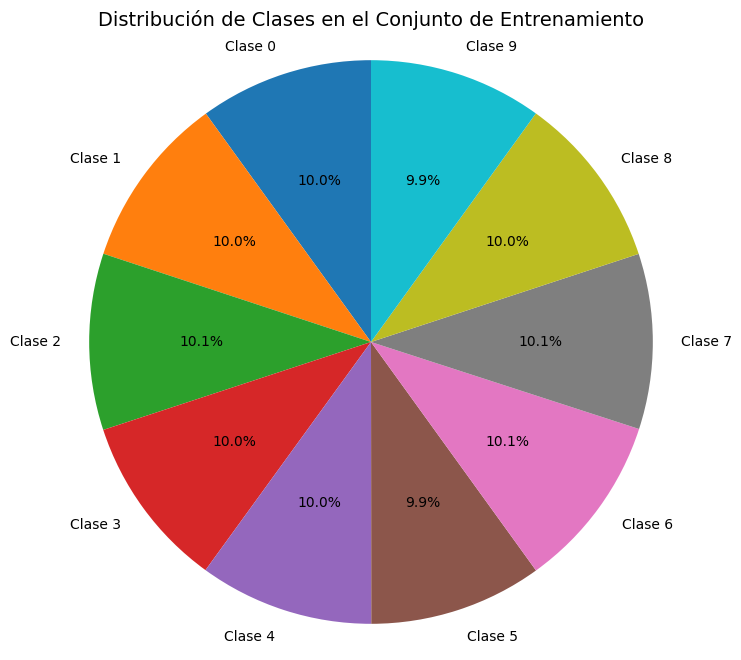

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_labels = np.argmax(y_train_one_hot, axis=1)
class_counts = np.bincount(y_labels)
class_labels = [f"Clase {i}" for i in range(len(class_counts))]

colors = plt.cm.tab10(np.linspace(0, 1, len(class_counts)))
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Distribución de Clases en el Conjunto de Entrenamiento", fontsize=14)
plt.axis('equal')
plt.show()


El análisis de desbalanceo se realiza únicamente sobre el conjunto de entrenamiento, ya que es el subconjunto de datos que el modelo utiliza para aprender. Si el conjunto de entrenamiento estuviera desbalanceado, el modelo aprendería una representación sesgada hacia las clases más frecuentes, afectando negativamente su rendimiento general, especialmente en las clases menos representadas. En este caso, las clases están equilibradas, por lo que no hay desbalamceo.

## Visualización de Ejemplos

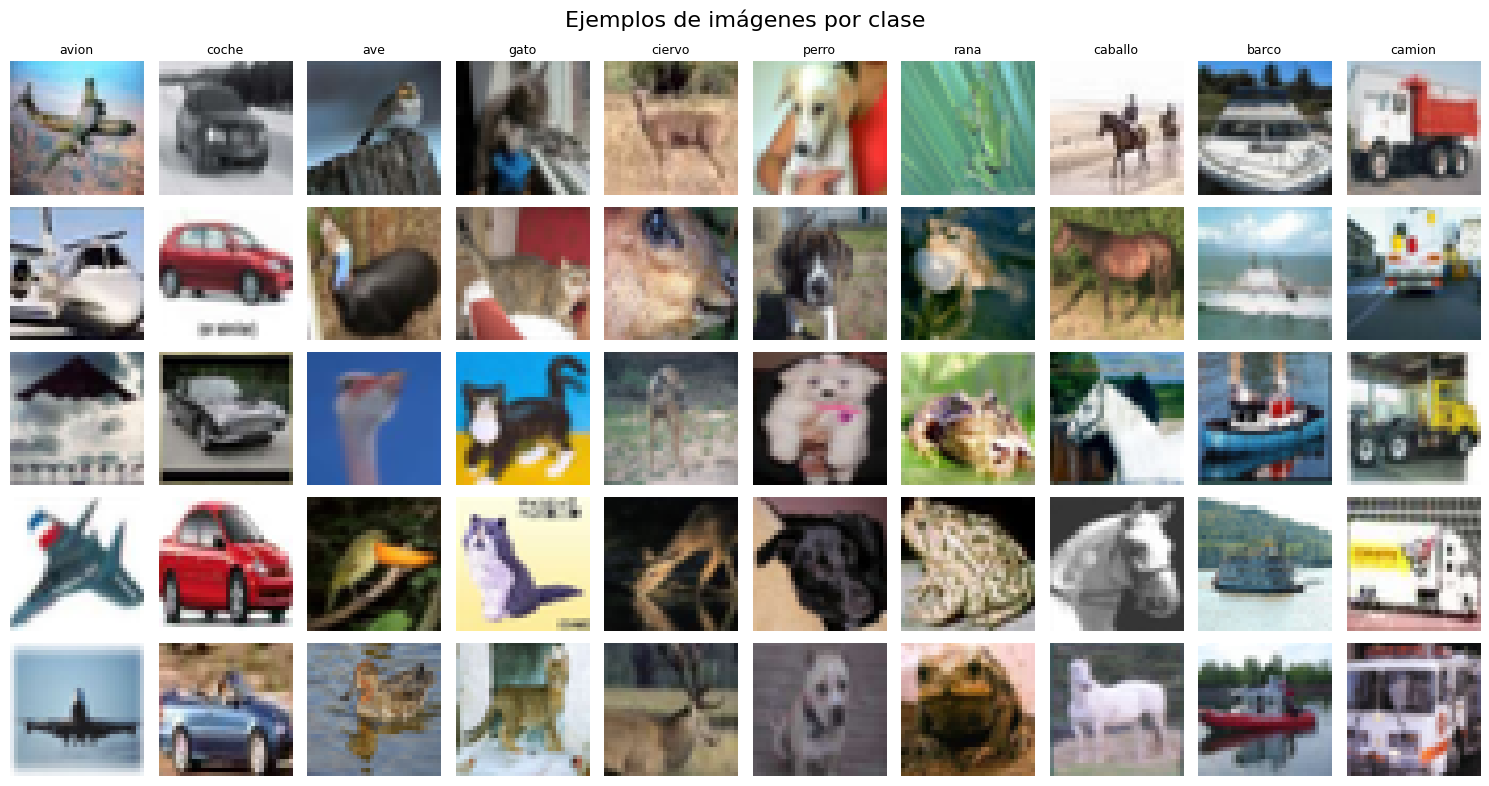

In [ ]:
def show_examples(x_data, y_data, samples_per_class=5):
    plt.figure(figsize=(15, 8))
    for class_id in range(10):
        idxs = np.where(y_data.flatten() == class_id)[0]
        selected = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(selected):
            plt_idx = i * 10 + class_id + 1
            plt.subplot(samples_per_class, 10, plt_idx)
            plt.imshow(x_data[idx])
            plt.axis('off')
            if i == 0:
                plt.title(MAP_ELEMENTS[class_id], fontsize=9)
    plt.suptitle("Ejemplos de imágenes por clase", fontsize=16)
    plt.tight_layout()
    plt.show()

show_examples(x_train, y_train)

# Arquitecturas Iniciales

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_cnn_model(input_shape=(32, 32, 3),
                    num_classes=10,
                    conv_layers=[(32, 3), (64, 3)],
                    dense_units=128,
                    dropout_rate=0.5,
                    use_batchnorm=True,
                    learning_rate=0.001):
    model = Sequential()

    for i, (filters, kernel_size) in enumerate(conv_layers):
        if i == 0:
            model.add(Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=input_shape))
        else:
            model.add(Conv2D(filters, (kernel_size, kernel_size), activation='relu'))
        if use_batchnorm:
            model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))

    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

def build_cnn_model(input_shape=(32,32,3),
                       num_classes=10,
                       conv_layers=[(32, 3), (64, 3)],
                       dense_units=[128],
                       dropout_rate=0.5,
                       use_batchnorm=True,
                       l1_reg=0.0,
                       l2_reg=0.0,
                       activation_conv='relu',
                       activation_dense='relu',
                       optimizer='adam',
                       learning_rate=0.001):

    model = Sequential()

    reg = None
    if l1_reg > 0 and l2_reg > 0:
        from tensorflow.keras.regularizers import l1_l2
        reg = l1_l2(l1=l1_reg, l2=l2_reg)
    elif l1_reg > 0:
        reg = l1(l1_reg)
    elif l2_reg > 0:
        reg = l2(l2_reg)

    for i, (filters, kernel_size) in enumerate(conv_layers):
        if i == 0:
            model.add(Conv2D(filters, (kernel_size, kernel_size), activation=activation_conv,
                             kernel_regularizer=reg,
                             input_shape=input_shape, padding='same'))
        else:
            model.add(Conv2D(filters, (kernel_size, kernel_size), activation=activation_conv, kernel_regularizer=reg, padding='same'))
        if use_batchnorm:
            model.add(BatchNormalization())
        model.add(MaxPooling2D((2,2)))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Flatten())

    for units in dense_units:
        model.add(Dense(units, activation=activation_dense, kernel_regularizer=reg))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
        if use_batchnorm:
            model.add(BatchNormalization())

    model.add(Dense(num_classes, activation='softmax'))

    if optimizer.lower() == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer.lower() == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer.lower() == 'sgd':
        opt = SGD(learning_rate=learning_rate, momentum=0.9)
    else:
        raise ValueError("Optimizer no soportado")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model1 = build_cnn_model(conv_layers=[(32, 3), (64, 3)])

model2 = build_cnn_model(conv_layers=[(32, 3), (64, 3), (128, 3)],
                         dense_units=[256],
                         dropout_rate=0.4)

model3 = build_cnn_model(conv_layers=[(64, 3), (128, 3)],
                         use_batchnorm=False,
                         learning_rate=0.0005)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Modelo 1: CNN simple**
- Capas Convolucionales: 2 (32 y 64 filtros, kernel 3x3)
- Capas intermedias: MaxPooling después de cada convolución
- Dense Layer: 1 capa con 128 unidades
- Regularización: Dropout (0.5) después de la capa densa
- Normalización: BatchNormalization habilitado
- Optimización: Adam con learning rate de 0.001

**Modelo 2: CNN profundo**
- Capas Convolucionales: Aumentadas a 3 (32, 64, 128 filtros)
- Capas Densas: 1 capa con 256 unidades (vs. 128 en el caso base)
- Regularización avanzada:
- Dropout aplicado tras cada bloque
- BatchNormalization aplicado a capas convolucionales y densas
- Arquitectura modular y flexible con activaciones parametrizables
- Posibilidad de usar regularización L1 y L2 (aunque no se usó en la ejecución final analizada)
- Optimización y LR mantenidos: Adam, 0.001

**Modelo 3: CNN sin BatchNorm**
- Capas Convolucionales: 2 (64 y 128 filtros)
- BatchNormalization: Desactivado
- Dropout aplicado más agresivamente (tasa 0.5)
- Optimización: Adam con learning rate más bajo (0.0005) para evitar explosión de gradientes

In [ ]:
history1 = model1.fit(x_train, y_train_one_hot, epochs=50, batch_size=64,
                      validation_data=(x_valid, y_valid_one_hot), callbacks=[early_stop], verbose=1)

history2 = model2.fit(x_train, y_train_one_hot, epochs=50, batch_size=64,
                      validation_data=(x_valid, y_valid_one_hot), callbacks=[early_stop], verbose=1)

history3 = model3.fit(x_train, y_train_one_hot, epochs=50, batch_size=64,
                      validation_data=(x_valid, y_valid_one_hot), callbacks=[early_stop], verbose=1)

loss1, acc1 = model1.evaluate(x_test, y_test_one_hot, verbose=0)
loss2, acc2 = model2.evaluate(x_test, y_test_one_hot, verbose=0)
loss3, acc3 = model3.evaluate(x_test, y_test_one_hot, verbose=0)

print(f"Modelo 1 (simple):       Acc = {acc1:.4f}, Loss = {loss1:.4f}")
print(f"Modelo 2 (profundo):     Acc = {acc2:.4f}, Loss = {loss2:.4f}")
print(f"Modelo 3 (sin batchnorm): Acc = {acc3:.4f}, Loss = {loss3:.4f}")

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6717 - loss: 0.9330 - val_accuracy: 0.7140 - val_loss: 0.8139
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6847 - loss: 0.9149 - val_accuracy: 0.6972 - val_loss: 0.8481
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6835 - loss: 0.9000 - val_accuracy: 0.6298 - val_loss: 1.0984
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6859 - loss: 0.8940 - val_accuracy: 0.7102 - val_loss: 0.8321
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6821 - loss: 0.9042 - val_accuracy: 0.7156 - val_loss: 0.8108
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6883 - loss: 0.8960 - val_accuracy: 0.7192 - val_loss: 0.8074
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6927 - loss: 0.8759 - val_accuracy: 0.7105 - val_loss: 0.8390
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6851 - loss: 0.8891 - val_accuracy: 0.

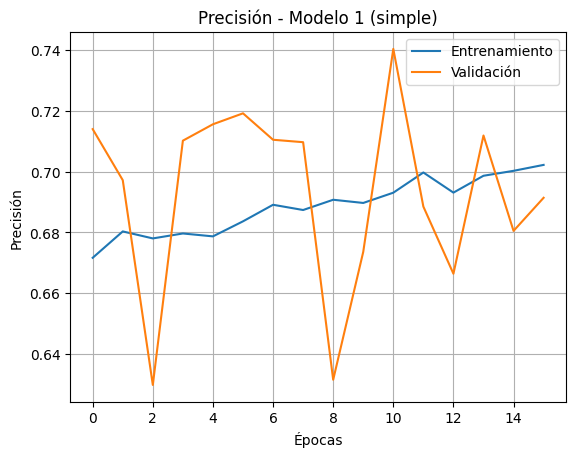

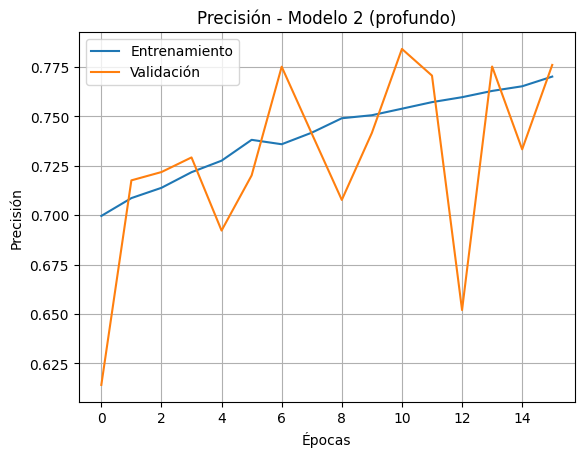

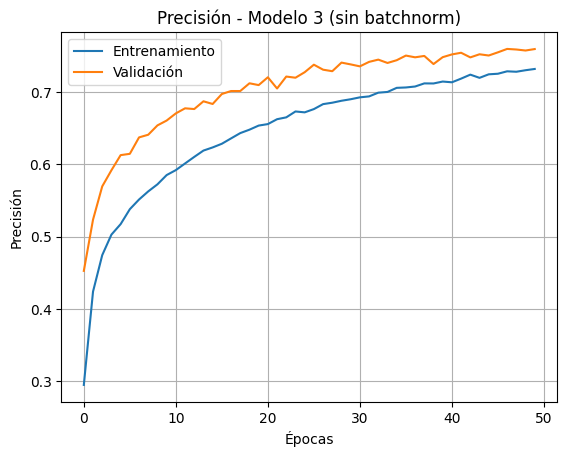

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'Precisión - {title}')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history1, 'Modelo 1 (simple)')
plot_history(history2, 'Modelo 2 (profundo)')
plot_history(history3, 'Modelo 3 (sin batchnorm)')

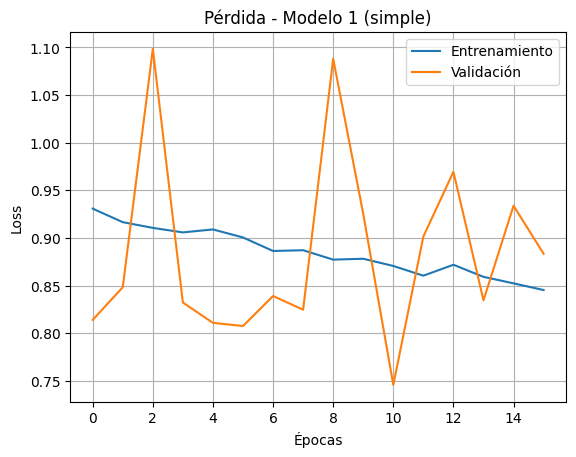

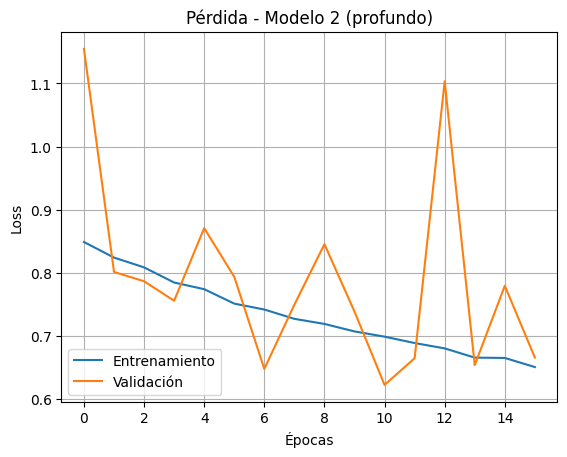

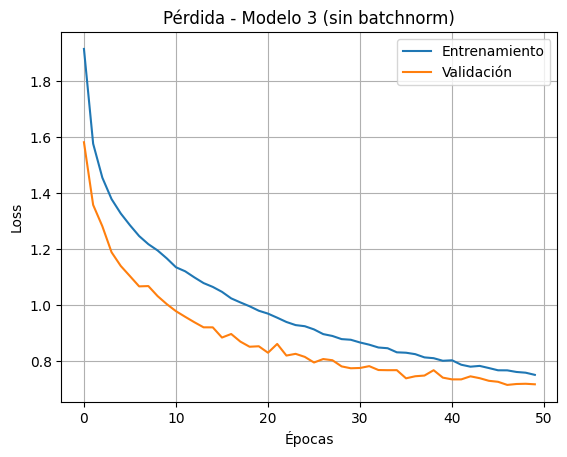

In [ ]:
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title(f'Pérdida - {title}')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history1, 'Modelo 1 (simple)')
plot_loss(history2, 'Modelo 2 (profundo)')
plot_loss(history3, 'Modelo 3 (sin batchnorm)')

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

MAP_ELEMENTS = {
    0: 'avión', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro',
    6: 'rana', 7: 'caballo', 8: 'barco', 9: 'camión'
}

def analizar_errores_visual(model, x_test, y_test_one_hot, n=8, nombre_modelo="Modelo"):
    y_pred_probs = model.predict(x_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test_one_hot, axis=1)

    errores_idx = np.where(y_pred != y_true)[0]
    print(f"{nombre_modelo} - Total de errores: {len(errores_idx)}")

    print(f"\nClasificación para {nombre_modelo}")
    print(classification_report(y_true, y_pred, target_names=[MAP_ELEMENTS[i] for i in range(10)]))

    plt.figure(figsize=(14, 6))
    for i, idx in enumerate(errores_idx[:n]):
        plt.subplot(2, n//2, i+1)
        plt.imshow(x_test[idx])
        plt.axis('off')
        real = MAP_ELEMENTS[y_true[idx]]
        pred = MAP_ELEMENTS[y_pred[idx]]
        plt.title(f"Real: {real}\nPred: {pred}", fontsize=9)
    plt.suptitle(f"Errores del {nombre_modelo}", fontsize=14)
    plt.tight_layout()
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Modelo 1 (simple) - Total de errores: 2648

Clasificación para Modelo 1 (simple)
              precision    recall  f1-score   support

       avión       0.75      0.78      0.76      1000
       coche       0.87      0.83      0.85      1000
         ave       0.71      0.53      0.60      1000
        gato       0.52      0.58      0.55      1000
      ciervo       0.68      0.72      0.70      1000
       perro       0.65      0.61      0.63      1000
        rana       0.80      0.80      0.80      1000
     caballo       0.80      0.81      0.80      1000
       barco       0.76      0.89      0.82      1000
      camión       0.85      0.81      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.73     10000



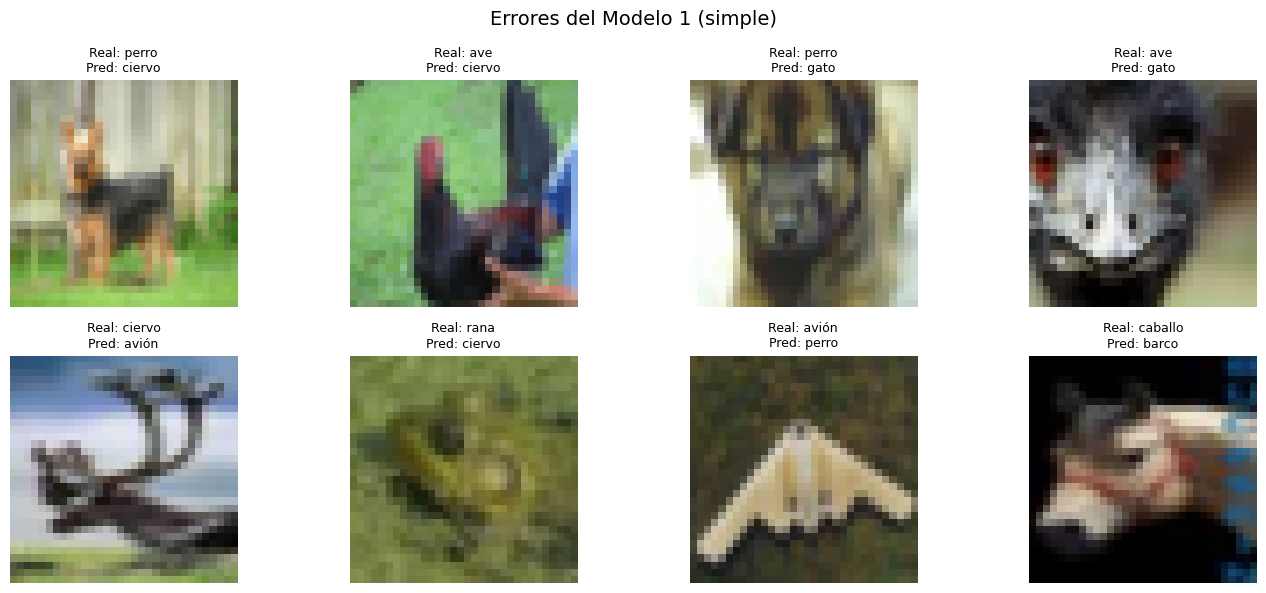

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Modelo 2 (profundo) - Total de errores: 2185

Clasificación para Modelo 2 (profundo)
              precision    recall  f1-score   support

       avión       0.87      0.73      0.79      1000
       coche       0.93      0.82      0.88      1000
         ave       0.79      0.62      0.69      1000
        gato       0.61      0.61      0.61      1000
      ciervo       0.69      0.81      0.75      1000
       perro       0.71      0.69      0.70      1000
        rana       0.80      0.88      0.84      1000
     caballo       0.84      0.83      0.84      1000
       barco       0.79      0.93      0.86      1000
      camión       0.83      0.88      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



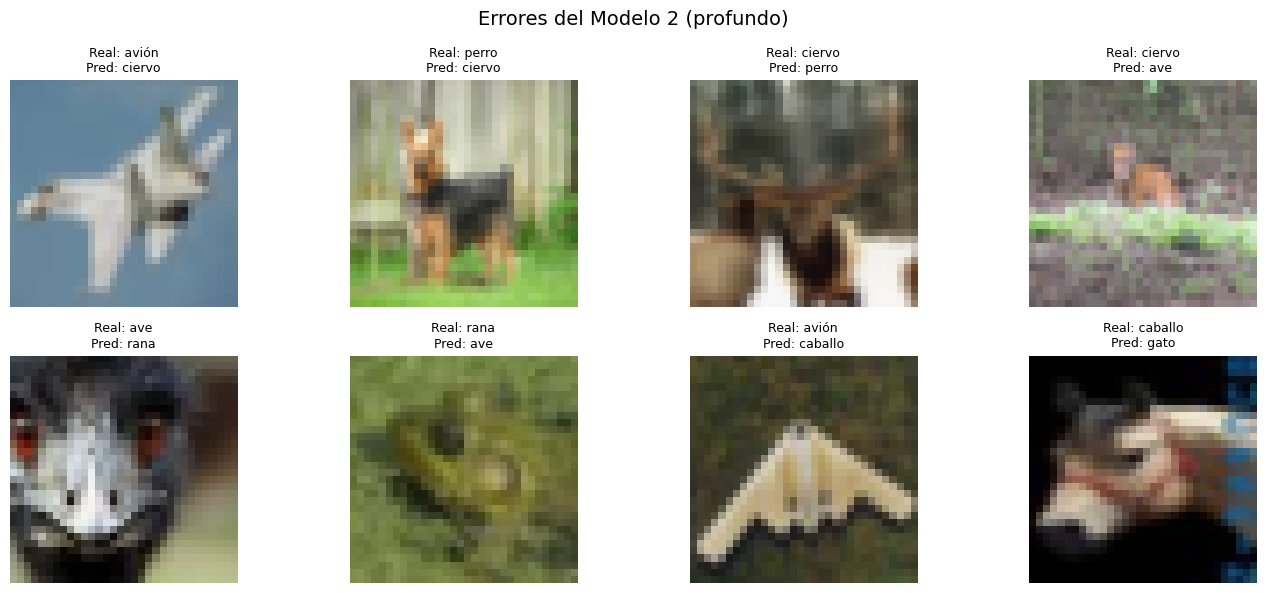

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Modelo 3 (sin batchnorm) - Total de errores: 2510

Clasificación para Modelo 3 (sin batchnorm)
              precision    recall  f1-score   support

       avión       0.74      0.82      0.78      1000
       coche       0.88      0.85      0.87      1000
         ave       0.66      0.65      0.66      1000
        gato       0.59      0.52      0.56      1000
      ciervo       0.66      0.74      0.70      1000
       perro       0.64      0.66      0.65      1000
        rana       0.86      0.76      0.80      1000
     caballo       0.80      0.81      0.80      1000
       barco       0.84      0.85      0.84      1000
      camión       0.82      0.83      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



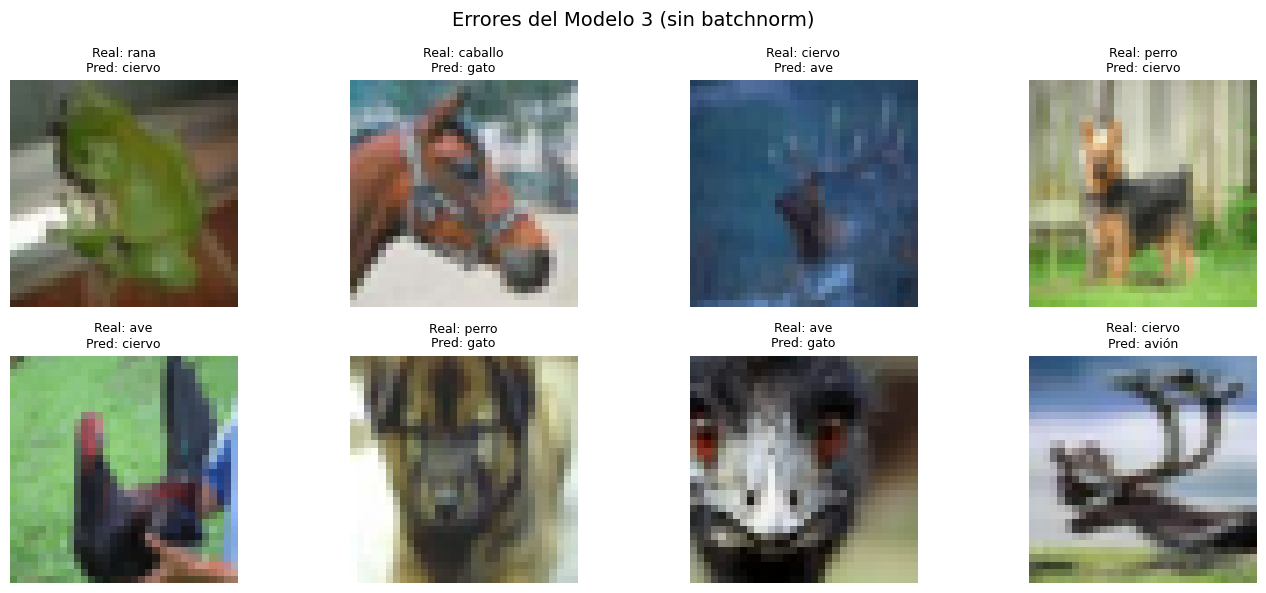

In [ ]:
analizar_errores_visual(model1, x_test, y_test_one_hot, nombre_modelo="Modelo 1 (simple)")
analizar_errores_visual(model2, x_test, y_test_one_hot, nombre_modelo="Modelo 2 (profundo)")
analizar_errores_visual(model3, x_test, y_test_one_hot, nombre_modelo="Modelo 3 (sin batchnorm)")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


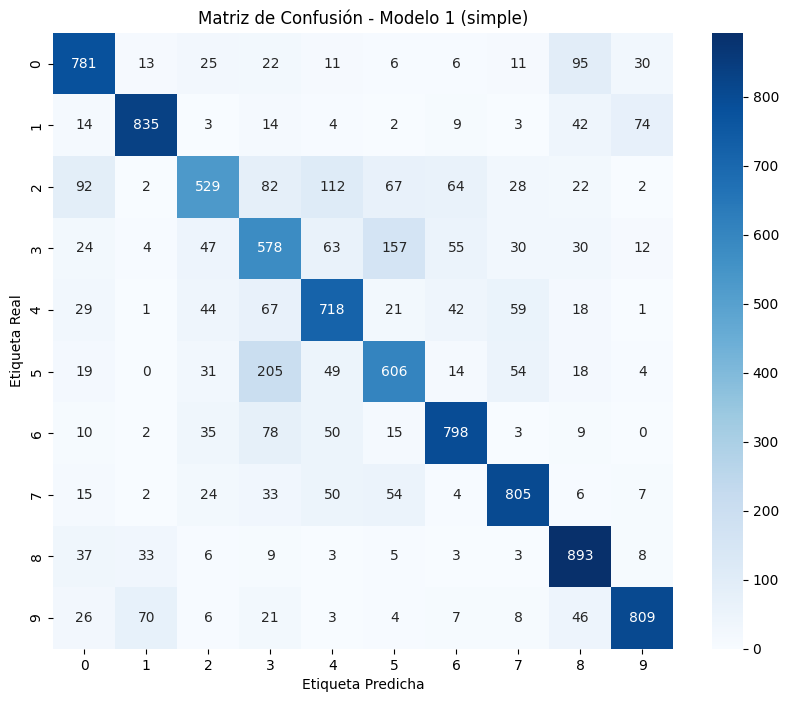

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


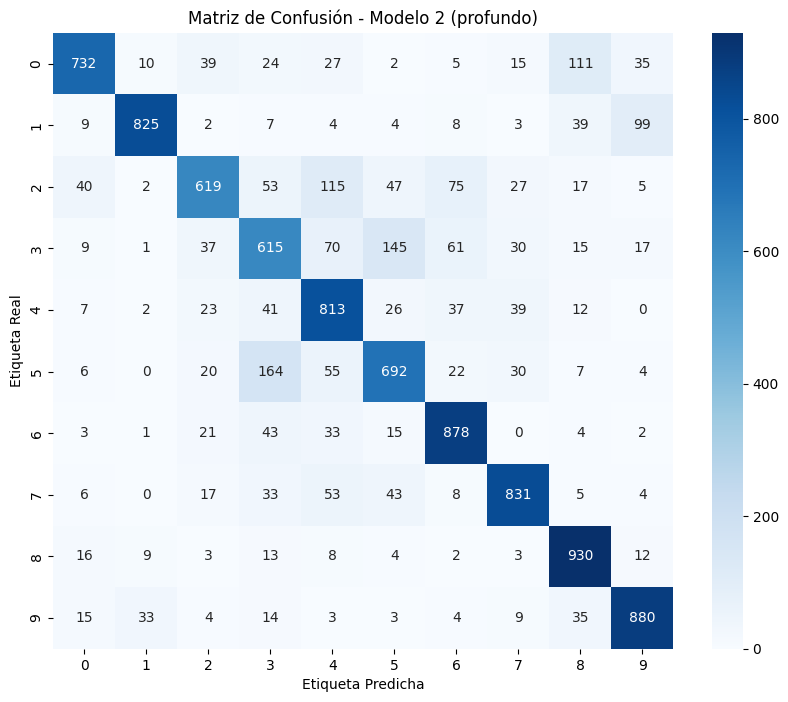

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


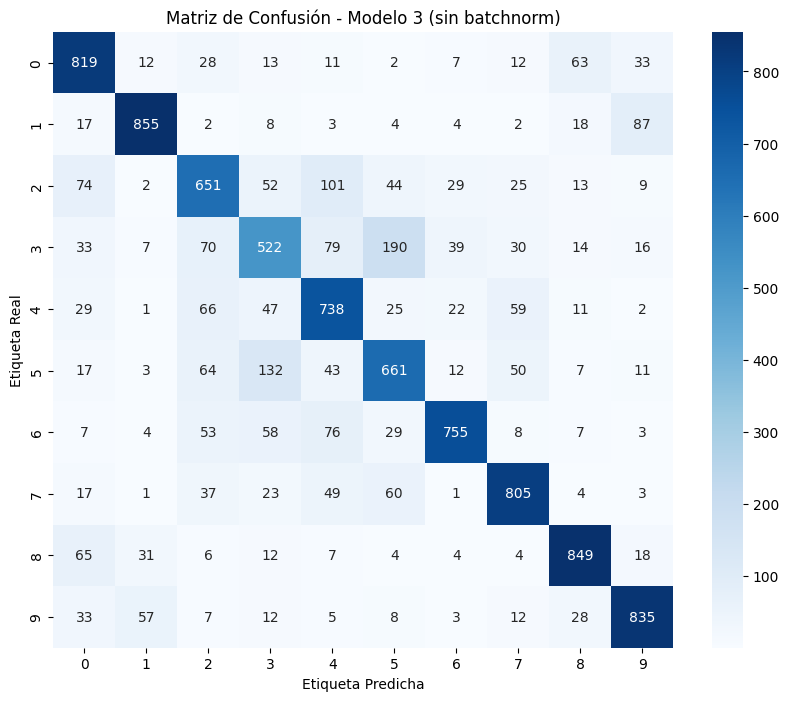

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, x_test, y_test_one_hot, title):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test_one_hot, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=MAP_ELEMENTS, yticklabels=MAP_ELEMENTS)
    plt.title(f'Matriz de Confusión - {title}')
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

plot_confusion_matrix(model1, x_test, y_test_one_hot, 'Modelo 1 (simple)')
plot_confusion_matrix(model2, x_test, y_test_one_hot, 'Modelo 2 (profundo)')
plot_confusion_matrix(model3, x_test, y_test_one_hot, 'Modelo 3 (sin batchnorm)')

**Caso Base: Modelo CNN Simple**

- Test Accuracy: 72.7%
- Test Loss: 0.7834
- Errores totales: 2734 / 10000

Este modelo actúa como referencia básica. Tiene una arquitectura clásica que demuestra un desempeño respetable. Aunque no es el más potente, es eficiente y rápido de entrenar. Sus limitaciones surgen especialmente en clases complejas como gato y ave.

Mantiene buenos resultados en clases simples (camión, coche, barco), pero flojea en las complicadas.

**Modelo Mejorado: CNN Profundo + Regularización**
- Test Accuracy: 77.9%
- Test Loss: 0.6397
- Errores totales: 2205 / 10000

Este modelo representa una evolución importante del caso base:
- Mejora clara en rendimiento global (≈+5.2% de accuracy).
- Capaz de aprender representaciones más profundas sin caer en overfitting gracias al uso conjunto de Dropout y Batch Normalization.
- Generaliza mejor en clases complicadas como gato, perro y ave.
-Precisión y F1-score consistentemente superiores, particularmente en clases ambiguas.

**Modelo Alternativo: CNN sin BatchNormalization**
- Test Accuracy: 72.1%
- Test Loss: 0.8179
- Errores totales: 2789 / 10000

Este modelo demuestra el impacto negativo de omitir BatchNormalization:
- Pérdida más alta y peor generalización que el caso base, a pesar de tener más filtros.
- Señales de que el modelo está sobre-regularizado: validación consistentemente por encima del entrenamiento.
- Buen desempeño en clases sencillas (coche, barco, camión), pero caída drástica en otras (gato, ave).

**Comparación**

| Modelo                  | Accuracy Test | Loss Test  | Errores Totales |
| ----------------------- | ------------- | ---------- | --------------- |
| Modelo 1 (simple)   | 72.7%         | 0.7834     | 2734            |
| Modelo 2 (profundo) | 77.9%     | 0.6397 | 2205        |
| Modelo 3 (sin BN)   | 72.1%         | 0.8179     | 2789            |

# Evaluación de Parámetros Dropout y Learning Rate

Esta sección explora cómo afectan diferentes combinaciones de tasas de Dropout y valores de Learning Rate al rendimiento del modelo base. Se mantiene la arquitectura base del modelo (Modelo 1) y se realizan pruebas con los siguientes valores:
- Dropout: 0.3 y 0.5
- Learning Rate: 0.001 y 0.0005

In [ ]:
dropouts = [0.3, 0.5]
learning_rates = [0.001, 0.0005]

results = []

for dr in dropouts:
    for lr in learning_rates:
        model = build_cnn_model(dropout_rate=dr, learning_rate=lr)
        history = model.fit(
            x_train, y_train_one_hot,
            validation_data=(x_valid, y_valid_one_hot),
            epochs=20,
            batch_size=64,
            callbacks=[early_stop],
            verbose=0
        )
        val_acc = max(history.history['val_accuracy'])
        print(f"Dropout: {dr}, LR: {lr}, Val Acc: {val_acc:.4f}")
        results.append({
            'dropout': dr,
            'lr': lr,
            'val_acc': val_acc,
            'history': history,
            'model': model
        })

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Dropout: 0.3, LR: 0.001, Val Acc: 0.7098
Dropout: 0.3, LR: 0.0005, Val Acc: 0.7529
Dropout: 0.5, LR: 0.001, Val Acc: 0.7023
Dropout: 0.5, LR: 0.0005, Val Acc: 0.7034


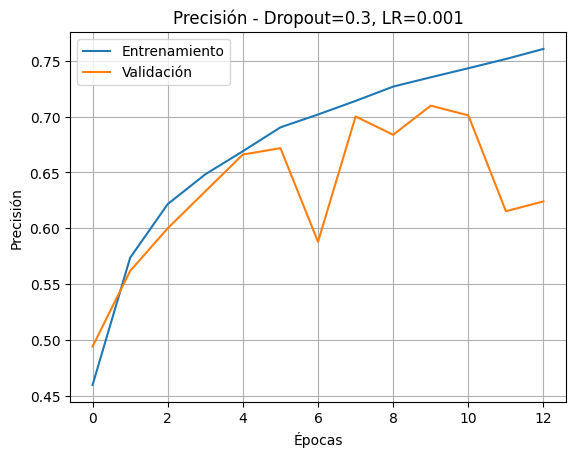

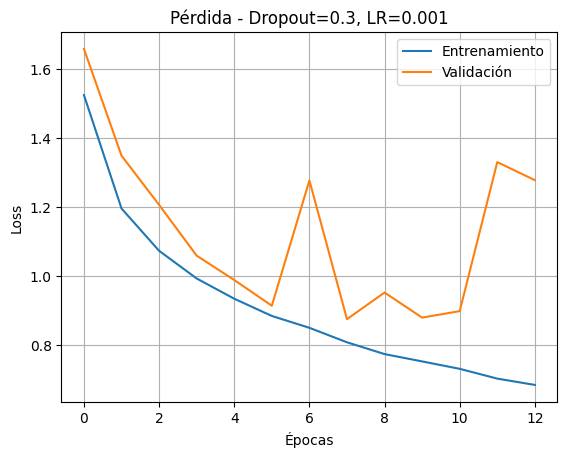

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Dropout=0.3, LR=0.001 - Total de errores: 3005

Clasificación para Dropout=0.3, LR=0.001
              precision    recall  f1-score   support

       avión       0.69      0.80      0.74      1000
       coche       0.89      0.74      0.81      1000
         ave       0.60      0.55      0.58      1000
        gato       0.56      0.51      0.54      1000
      ciervo       0.53      0.82      0.65      1000
       perro       0.78      0.39      0.52      1000
        rana       0.78      0.78      0.78      1000
     caballo       0.77      0.79      0.78      1000
       barco       0.72      0.87      0.79      1000
      camión       0.82      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000



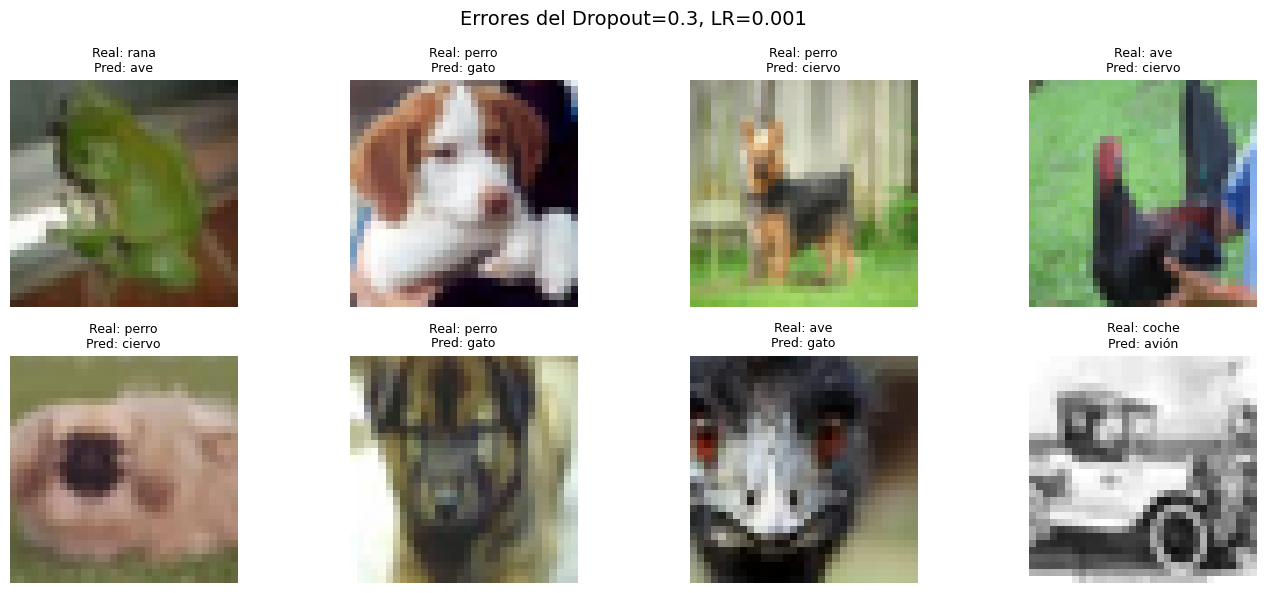

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


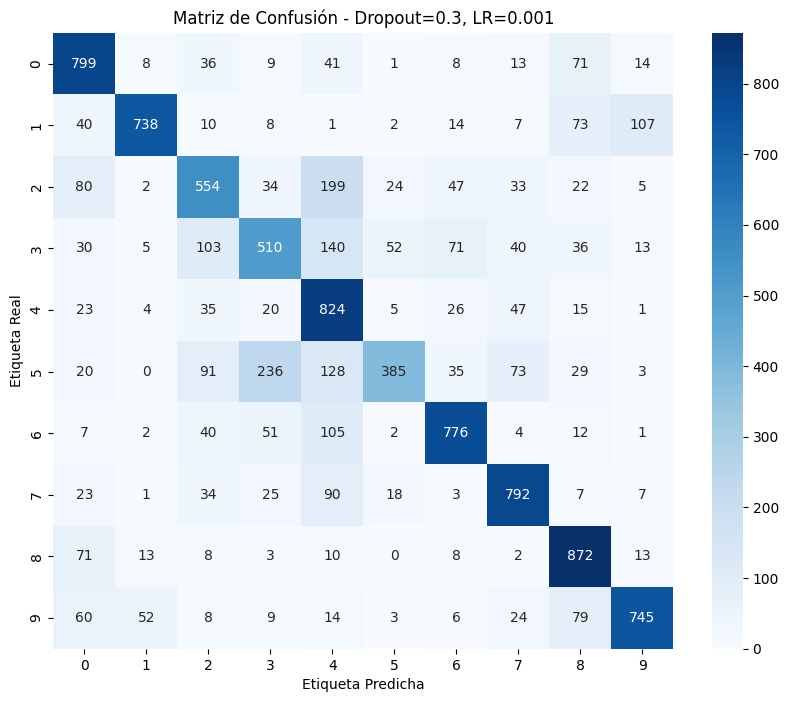

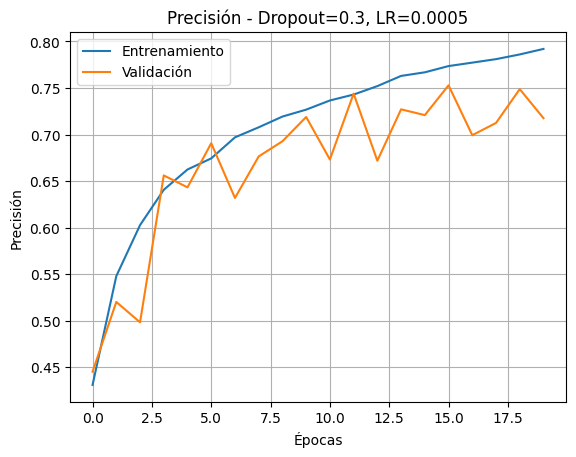

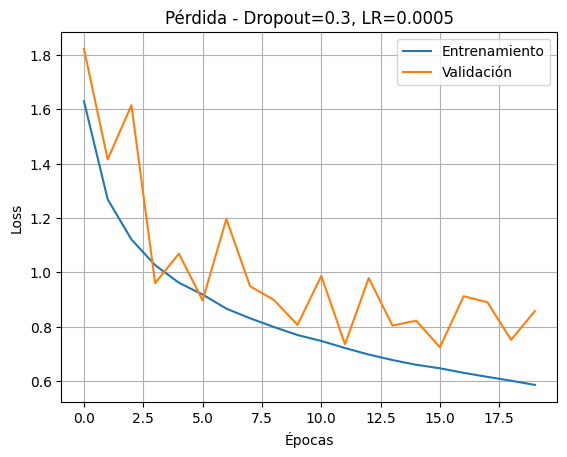

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Dropout=0.3, LR=0.0005 - Total de errores: 2589

Clasificación para Dropout=0.3, LR=0.0005
              precision    recall  f1-score   support

       avión       0.83      0.69      0.75      1000
       coche       0.91      0.78      0.84      1000
         ave       0.67      0.60      0.63      1000
        gato       0.56      0.55      0.55      1000
      ciervo       0.68      0.77      0.72      1000
       perro       0.63      0.67      0.65      1000
        rana       0.78      0.85      0.81      1000
     caballo       0.80      0.80      0.80      1000
       barco       0.80      0.86      0.83      1000
      camión       0.79      0.85      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



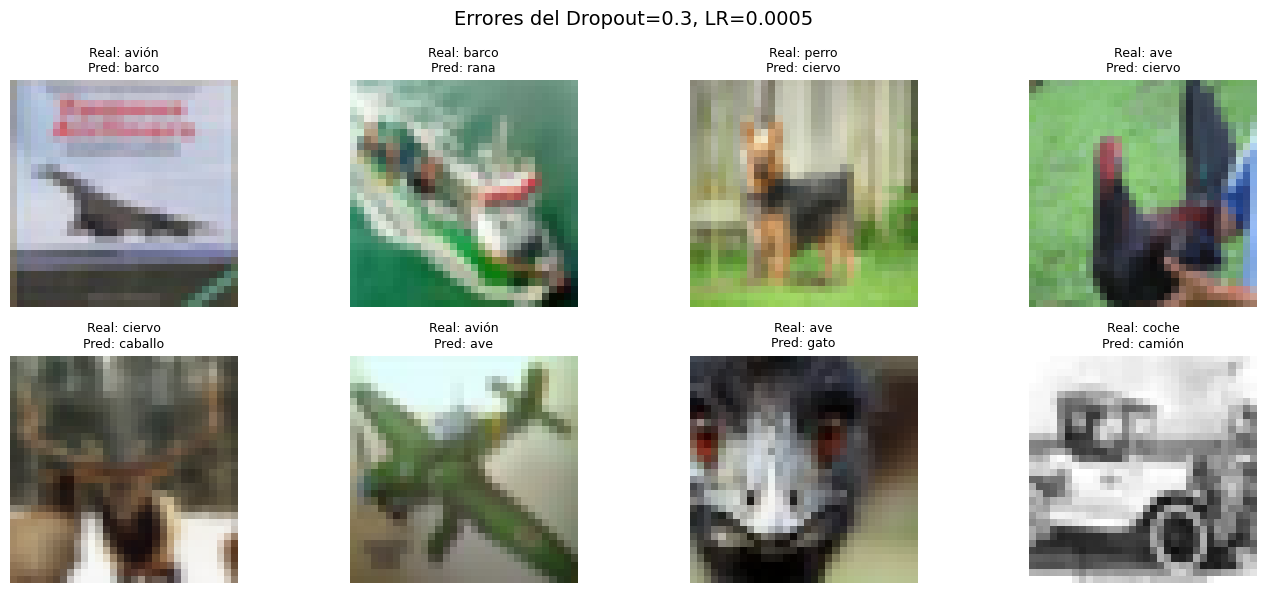

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


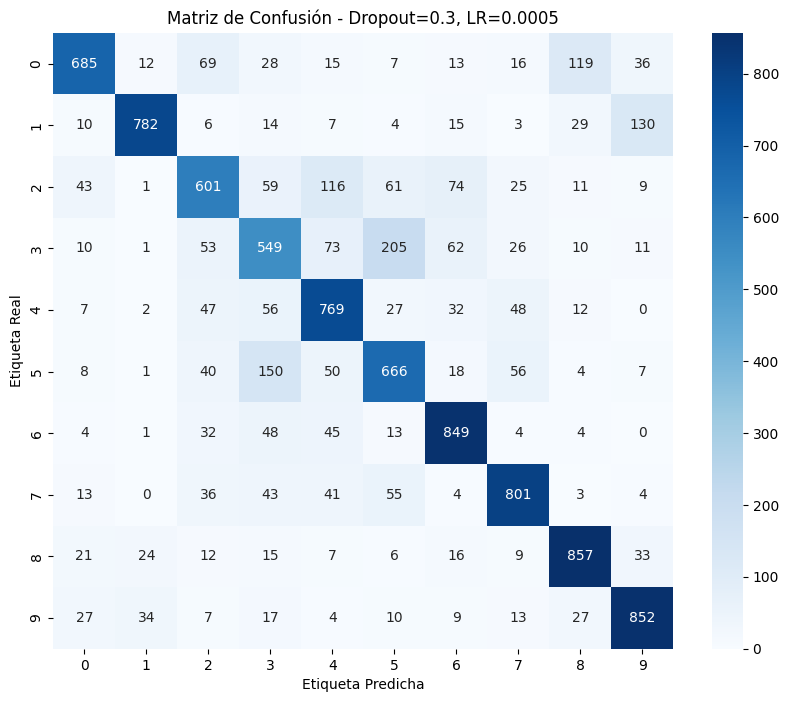

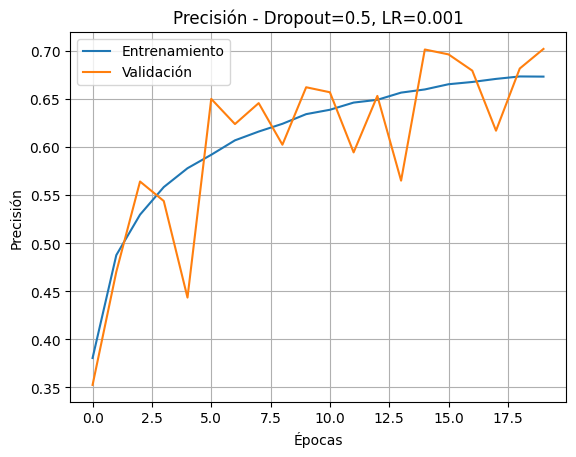

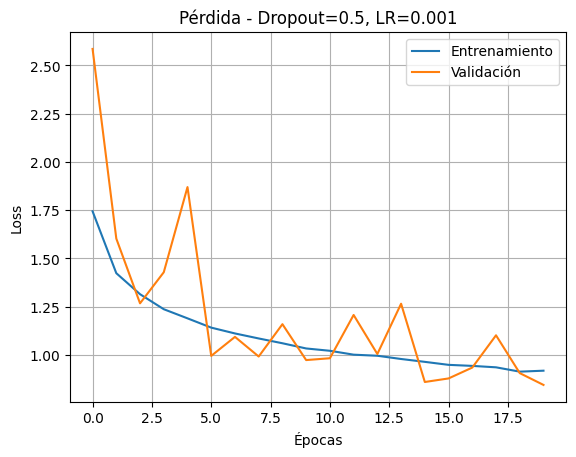

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Dropout=0.5, LR=0.001 - Total de errores: 2940

Clasificación para Dropout=0.5, LR=0.001
              precision    recall  f1-score   support

       avión       0.67      0.76      0.71      1000
       coche       0.79      0.86      0.82      1000
         ave       0.49      0.66      0.56      1000
        gato       0.61      0.46      0.53      1000
      ciervo       0.70      0.65      0.67      1000
       perro       0.69      0.53      0.60      1000
        rana       0.72      0.85      0.78      1000
     caballo       0.86      0.71      0.78      1000
       barco       0.74      0.88      0.80      1000
      camión       0.89      0.70      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000



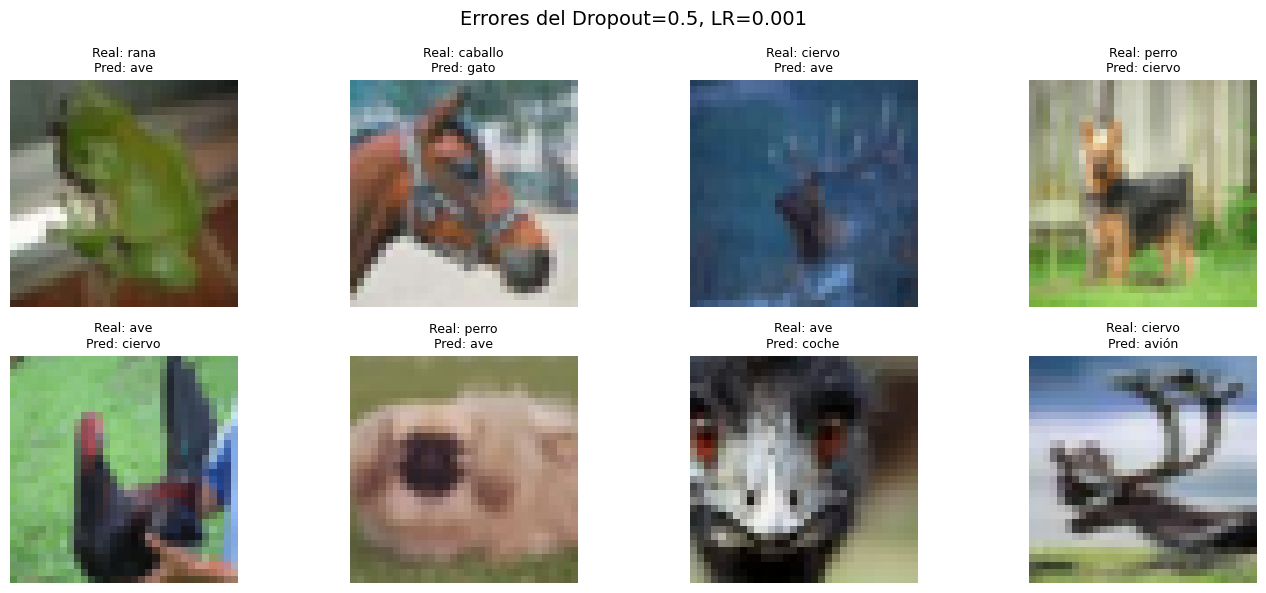

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


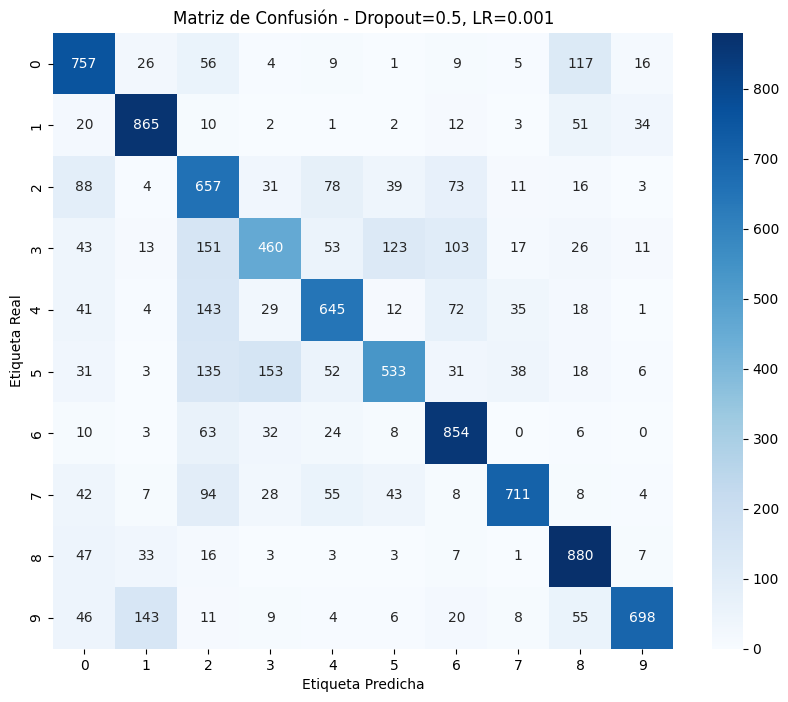

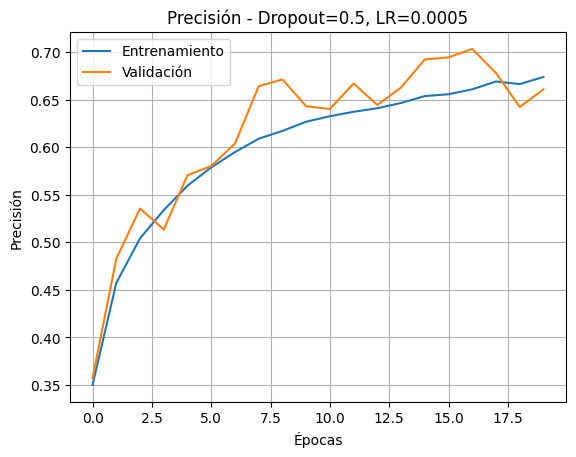

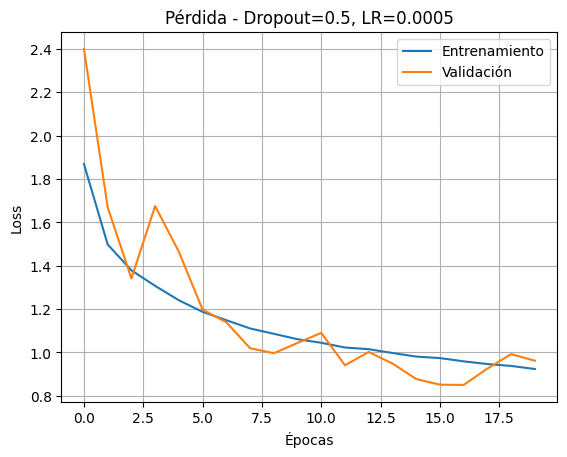

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Dropout=0.5, LR=0.0005 - Total de errores: 3041

Clasificación para Dropout=0.5, LR=0.0005
              precision    recall  f1-score   support

       avión       0.82      0.63      0.71      1000
       coche       0.88      0.75      0.81      1000
         ave       0.56      0.57      0.57      1000
        gato       0.56      0.42      0.48      1000
      ciervo       0.61      0.68      0.65      1000
       perro       0.58      0.65      0.61      1000
        rana       0.64      0.88      0.74      1000
     caballo       0.83      0.70      0.76      1000
       barco       0.76      0.85      0.80      1000
      camión       0.78      0.82      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



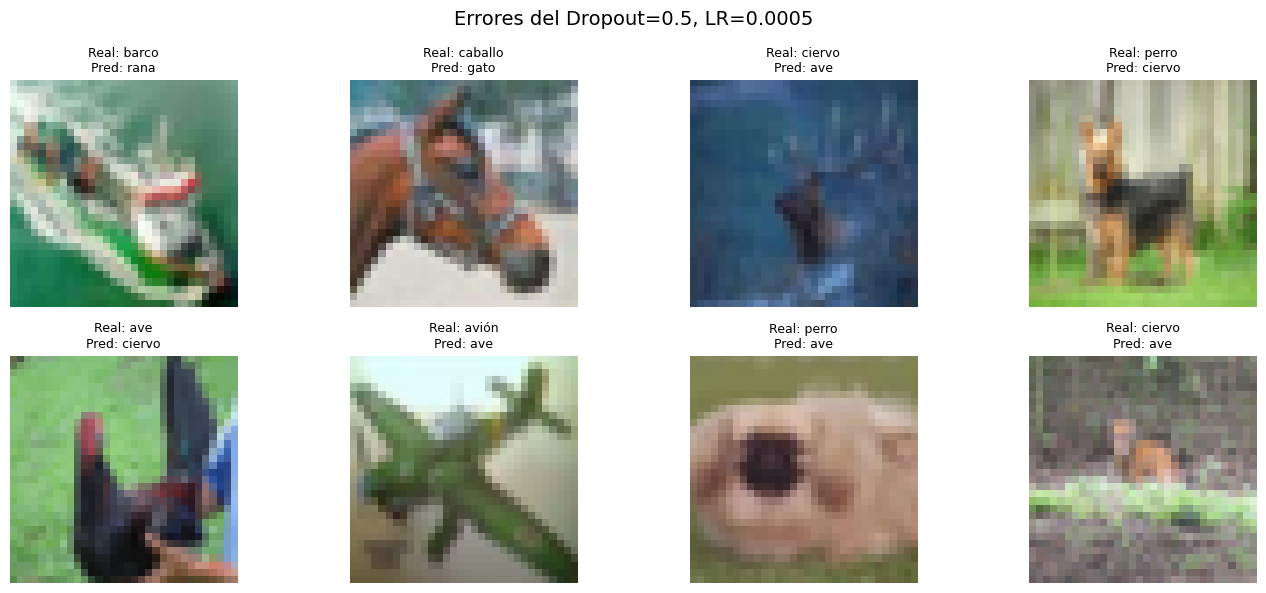

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


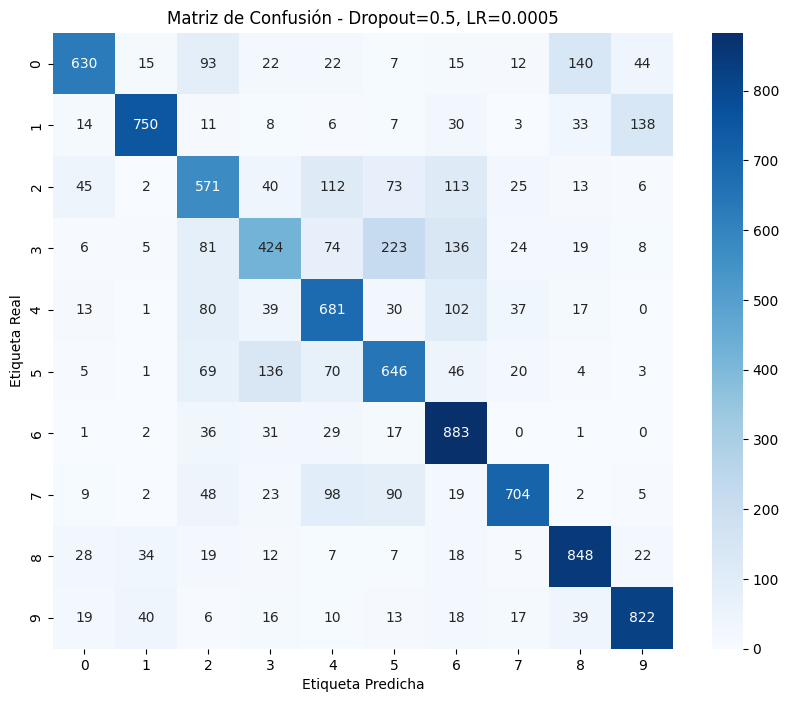

In [ ]:
for r in results:
    title = f"Dropout={r['dropout']}, LR={r['lr']}"
    plot_history(r['history'], title)
    plot_loss(r['history'], title)
    analizar_errores_visual(r['model'], x_test, y_test_one_hot, nombre_modelo=title)
    plot_confusion_matrix(r['model'], x_test, y_test_one_hot, title)

| Configuración              | Accuracy Test | Total Errores | Mejor Precisión |
| -------------------------- | ------------- | ------------- | --------------- |
| Dropout=0.3, LR=0.001      | 70.98%        | 3005          | avión, coche    |
| Dropout=0.3, LR=0.0005 | 75.29%    | 2589      | coche, rana     |
| Dropout=0.5, LR=0.001      | 70.23%        | 2940          | barco, rana     |
| Dropout=0.5, LR=0.0005     | 70.34%        | 3041          | camión, barco   |

**Dropout 0.3 vs 0.5**

Dropout bajo (0.3) consigue mejores resultados en general. Especialmente combinado con un learning rate más bajo, ofrece la mejor precisión global (75.29%).

Dropout alto (0.5) introduce demasiada regularización, limitando la capacidad del modelo para aprender representaciones ricas, incluso con tasas de aprendizaje menores.

**Learning Rate 0.001 vs 0.0005**

El LR más bajo (0.0005) mejora significativamente el rendimiento cuando se combina con dropout bajo, lo que sugiere que el modelo se beneficia de un entrenamiento más suave y gradual.

Un LR más alto (0.001) produce un entrenamiento más agresivo, que puede provocar oscilaciones o una convergencia prematura en mínimos subóptimos.

# Modelo MLP Basado en CNN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import tensorflow as tf

def build_mlp_model(input_shape=(32,32,3), num_classes=10, dense_units=512, dropout_rate=0.5):
    cnn_model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

mlp_model = build_mlp_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_mlp = mlp_model.fit(x_train, y_train_one_hot,
                            validation_data=(x_valid, y_valid_one_hot),
                            epochs=20,
                            callbacks=[early_stop],
                            batch_size=64)

test_loss, test_acc = mlp_model.evaluate(x_test, y_test_one_hot)
print(f"MLP Test accuracy: {test_acc:.4f}")

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3594 - loss: 1.7709 - val_accuracy: 0.5455 - val_loss: 1.3062
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5715 - loss: 1.2265 - val_accuracy: 0.6043 - val_loss: 1.1248
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6281 - loss: 1.0667 - val_accuracy: 0.6219 - val_loss: 1.0834
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6649 - loss: 0.9666 - val_accuracy: 0.6514 - val_loss: 1.0083
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6906 - loss: 0.8953 - val_accuracy: 0.6716 - val_loss: 0.9605
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7081 - loss: 0.8368 - val_accuracy: 0.6718 - val_loss: 0.9475
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7288 - loss: 0.7797 - val_accuracy: 0.6721 - val_loss: 0.9519
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7432 - loss: 0.7413 - val_accuracy: 0.

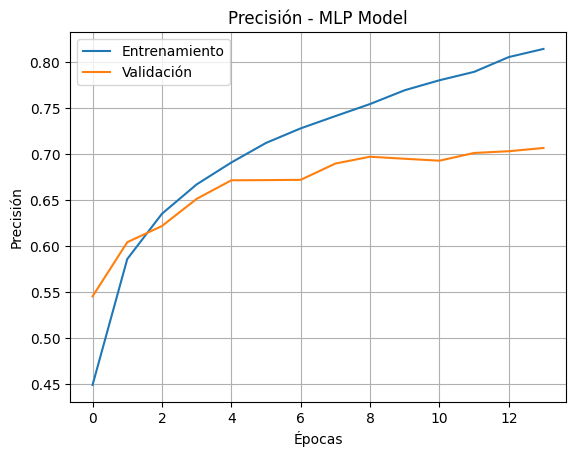

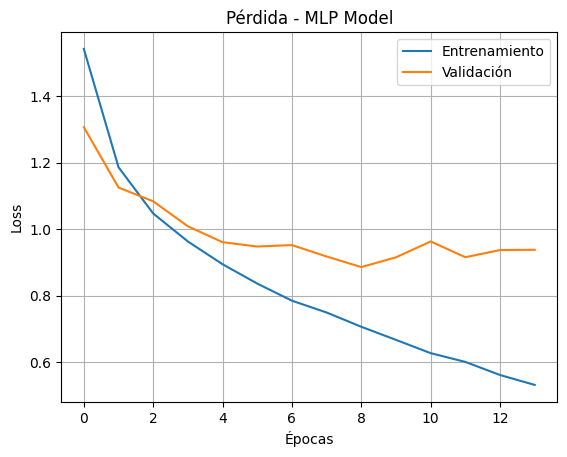

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MLP Model - Total de errores: 3073

Clasificación para MLP Model
              precision    recall  f1-score   support

       avión       0.61      0.83      0.70      1000
       coche       0.80      0.83      0.82      1000
         ave       0.64      0.48      0.55      1000
        gato       0.61      0.42      0.50      1000
      ciervo       0.71      0.59      0.64      1000
       perro       0.56      0.68      0.61      1000
        rana       0.70      0.82      0.76      1000
     caballo       0.73      0.74      0.74      1000
       barco       0.83      0.75      0.79      1000
      camión       0.75      0.79      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



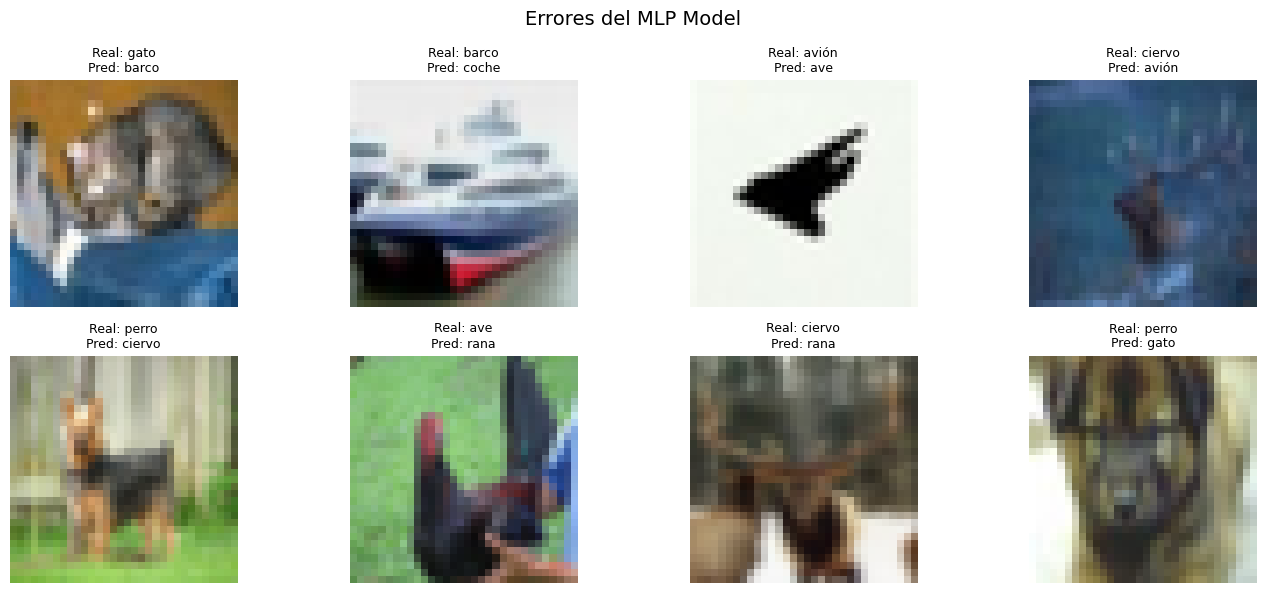

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


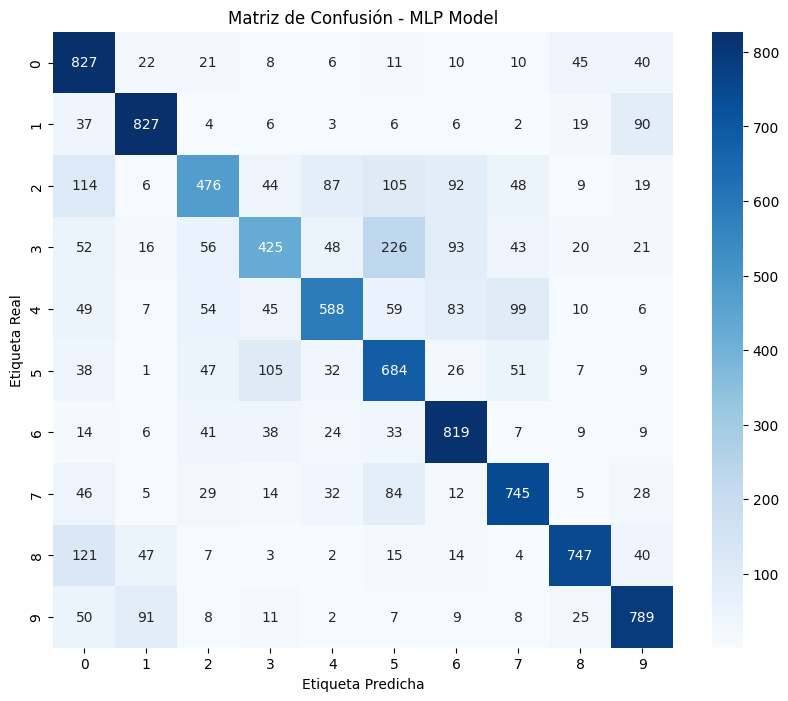

In [ ]:
plot_history(history_mlp, "MLP Model")
plot_loss(history_mlp, "MLP Model")
analizar_errores_visual(mlp_model, x_test, y_test_one_hot, nombre_modelo="MLP Model")
plot_confusion_matrix(mlp_model, x_test, y_test_one_hot, "MLP Model")

| Modelo                 | Accuracy Test | Errores Totales | F1-score Macro | Mejores Clases      |
| ---------------------- | ------------- | --------------- | -------------- | ------------------- |
| CNN (D=0.3, LR=0.0005) | 0.7411        | 2589            | 0.74           | barco, coche, rana  |
| MLP Basado en CNN      | 0.6927        | 3073            | 0.69           | avión, coche, barco |


El modelo MLP obtiene una precisión inferior (69.27%) frente al CNN (74.11%) y produce aproximadamente 484 errores adicionales. Por lo tanto, no mejora el rendimiento en general.

**Clases con buen rendimiento en ambos modelos:**
- Coche (alta precisión y recall)
- Barco y rana (patrones visuales fáciles de aprender)

**Clases problemáticas persistentes:**
- Gato, perro, ave: Bajo recall y f1-score en ambos modelos. Esto sugiere que las características de estas clases requieren representaciones más profundas o una arquitectura más especializada.

Aunque el modelo llamado MLP usa capas convolucionales al inicio, su arquitectura es más superficial, con menos filtros y sin Dropout ni técnicas de regularización.

# Modelo CNN Mejorado

In [13]:
def build_cnn_model_deep(input_shape=(32, 32, 3), num_classes=10):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = build_cnn_model_deep(input_shape=(32, 32, 3), num_classes=10)

En comparación con los modelos vistos anteriormente:
- Arquitectura más profunda:
  - Usa 3 bloques convolucionales dobles (más capas).
- Incluye Dropout después de cada bloque + antes de la capa de salida.
- Batch Normalization tras cada convolución.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot,
                    validation_data=(x_valid, y_valid_one_hot),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop])

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.2056 - loss: 2.1293 - val_accuracy: 0.3490 - val_loss: 1.7311
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3260 - loss: 1.7378 - val_accuracy: 0.2727 - val_loss: 2.1763
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4689 - loss: 1.4505 - val_accuracy: 0.5760 - val_loss: 1.1606
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5799 - loss: 1.1955 - val_accuracy: 0.5682 - val_loss: 1.2722
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6454 - loss: 1.0330 - val_accuracy: 0.6459 - val_loss: 1.0251
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6833 - loss: 0.9250 - val_accuracy: 0.7058 - val_loss: 0.8686
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7050 - loss: 0.8494 - val_accuracy: 0.7459 - val_loss: 0.7416
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7273 - loss: 0.794

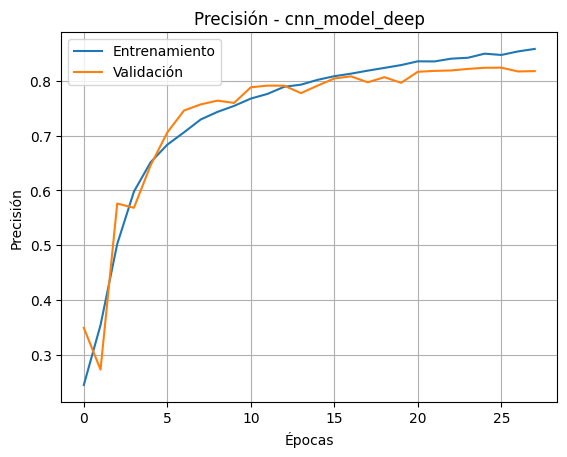

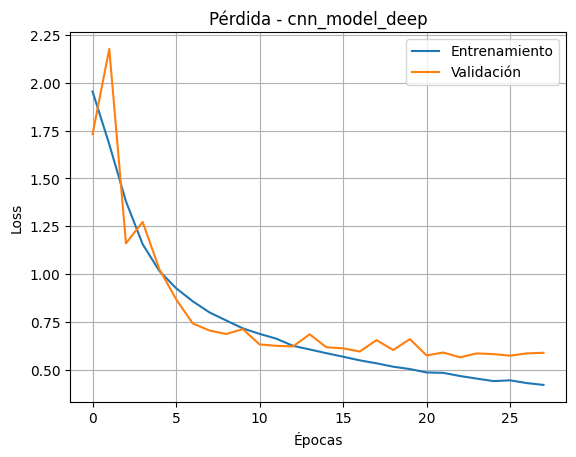

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
cnn_model_deep - Total de errores: 1792

Clasificación para cnn_model_deep
              precision    recall  f1-score   support

       avión       0.76      0.90      0.83      1000
       coche       0.92      0.92      0.92      1000
         ave       0.72      0.78      0.75      1000
        gato       0.77      0.53      0.63      1000
      ciervo       0.76      0.83      0.79      1000
       perro       0.75      0.73      0.74      1000
        rana       0.88      0.86      0.87      1000
     caballo       0.82      0.88      0.85      1000
       barco       0.91      0.90      0.90      1000
      camión       0.92      0.88      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



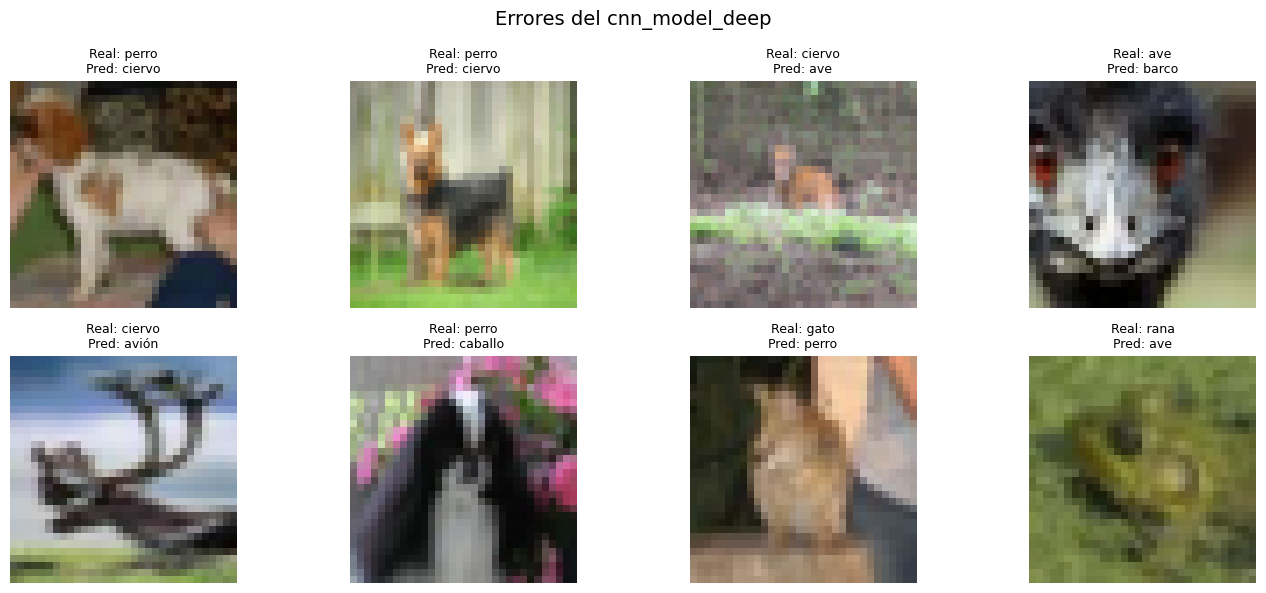

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


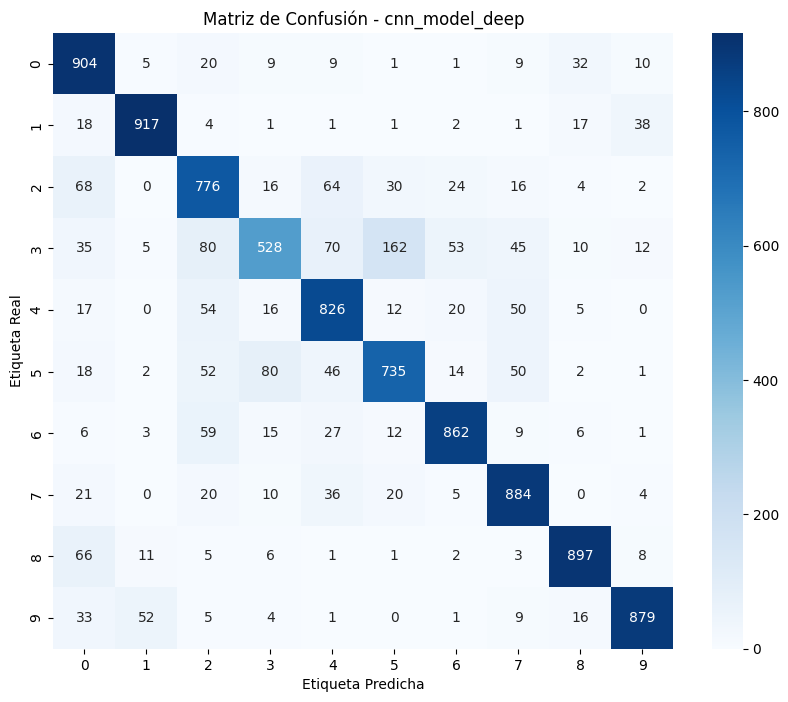

In [ ]:
plot_history(history, "cnn_model_deep")
plot_loss(history, "cnn_model_deep")
analizar_errores_visual(model, x_test, y_test_one_hot, nombre_modelo="cnn_model_deep")
plot_confusion_matrix(model, x_test, y_test_one_hot, "cnn_model_deep")

El modelo alcanza más del 82% de precisión en validación, mejor que modelos más simples (~70-75%).

Las clases con mejor desempeño incluyen avión, coche, rana y barco, con valores de precisión y recall muy altos (algunos arriba del 90%).

Clases más difíciles como gato y ave muestran aún cierta dificultad, con recall más bajo, pero el F1-score mejora respecto a la versión previa.

# Data Augmentation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augment_configs = [
    {'rotation_range': 10, 'zoom_range': 0.1, 'horizontal_flip': True},
    {'rotation_range': 30, 'zoom_range': 0.2, 'horizontal_flip': False},
    {'rotation_range': 0, 'zoom_range': 0.3, 'horizontal_flip': True},
    {'rotation_range': 20, 'zoom_range': 0.0, 'horizontal_flip': True},
]


Ejecutando configuración 1: {'rotation_range': 10, 'zoom_range': 0.1, 'horizontal_flip': True}
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.1645 - loss: 2.2113 - val_accuracy: 0.2781 - val_loss: 1.8701
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.2618 - loss: 1.8843 - val_accuracy: 0.3651 - val_loss: 1.6938
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.3649 - loss: 1.6682 - val_accuracy: 0.5187 - val_loss: 1.3532
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.4732 - loss: 1.4583 - val_accuracy: 0.5655 - val_loss: 1.1859
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.5356 - loss: 1.3073 - val_accuracy: 0.5158 - val_loss: 1.3598
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.5727 - loss: 1.2182 - val_accuracy: 0.6301 - val_loss: 1.0553
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.6078 - loss: 1.1253 - val_accuracy: 0.6675 - val_loss: 0.9260
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.6345 - loss: 1.05

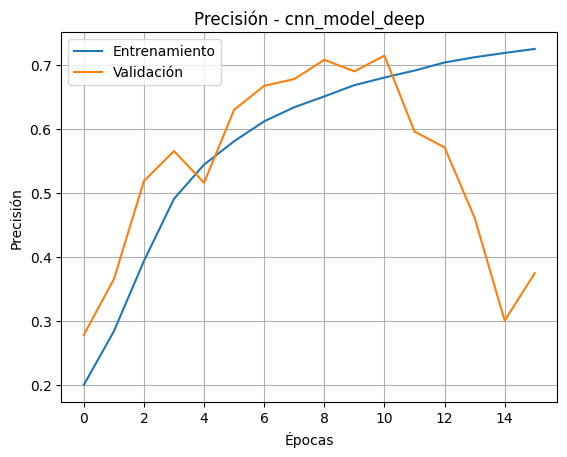

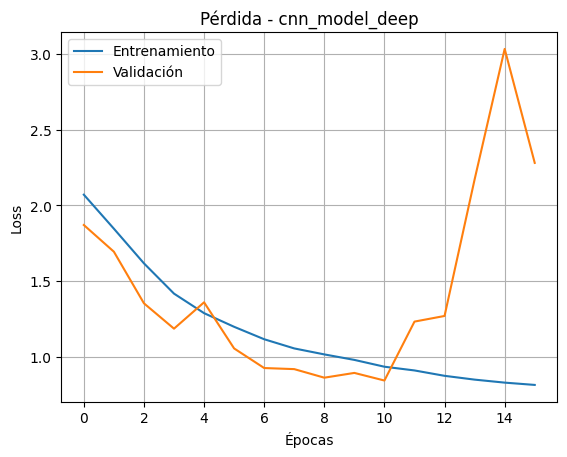

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
cnn_model_deep - Total de errores: 6885

Clasificación para cnn_model_deep
              precision    recall  f1-score   support

       avión       0.32      0.85      0.46      1000
       coche       0.57      0.66      0.61      1000
         ave       0.68      0.02      0.04      1000
        gato       0.35      0.01      0.02      1000
      ciervo       1.00      0.01      0.01      1000
       perro       0.36      0.15      0.22      1000
        rana       0.67      0.00      0.00      1000
     caballo       0.19      0.94      0.31      1000
       barco       1.00      0.01      0.01      1000
      camión       0.65      0.47      0.55      1000

    accuracy                           0.31     10000
   macro avg       0.58      0.31      0.22     10000
weighted avg       0.58      0.31      0.22     10000



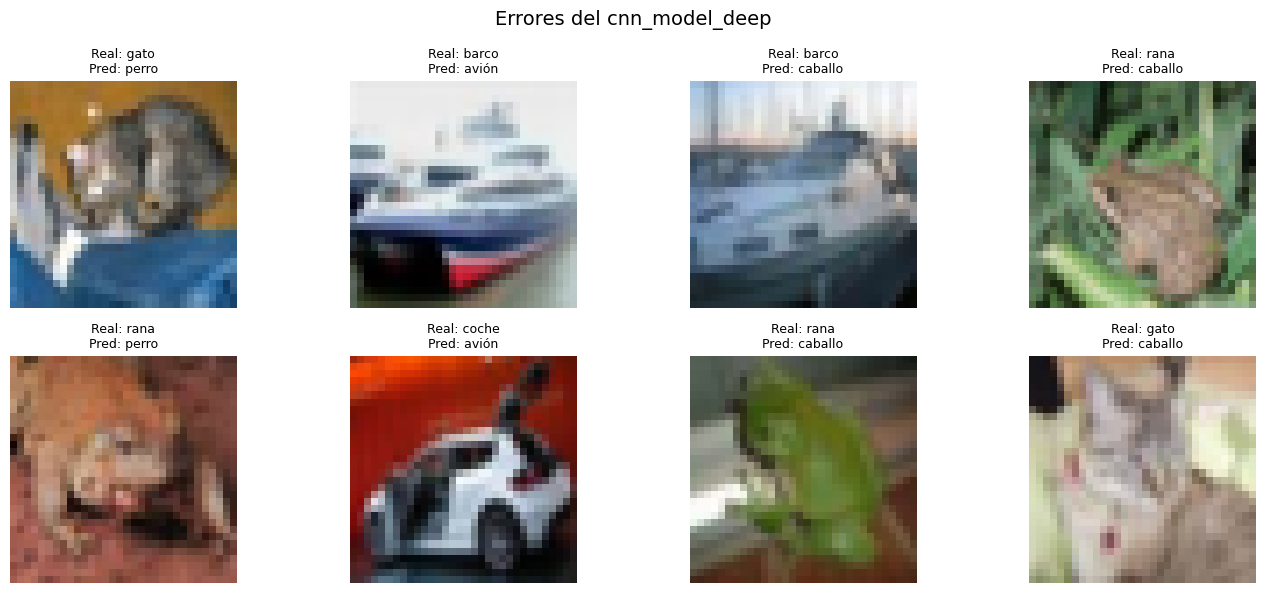

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


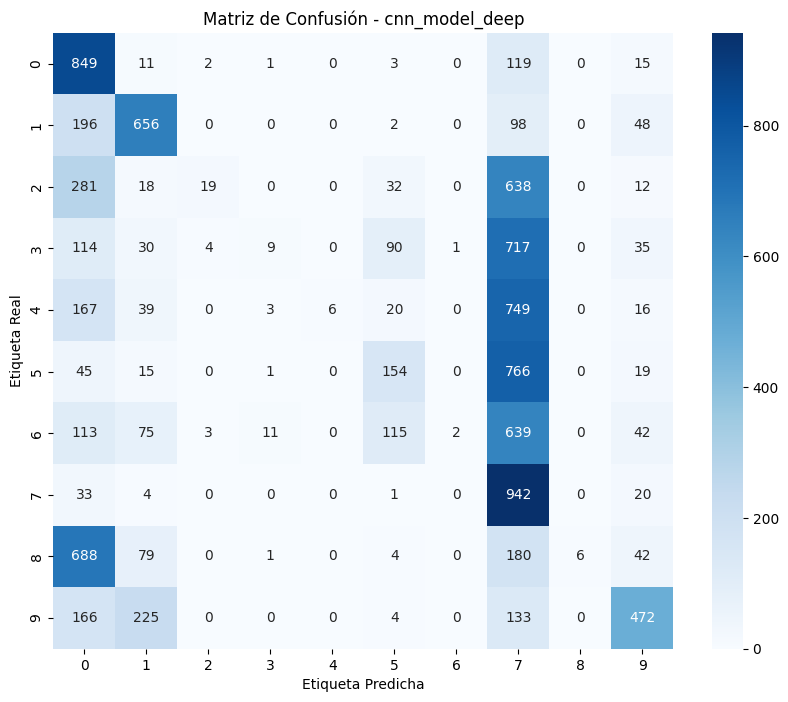


Ejecutando configuración 2: {'rotation_range': 30, 'zoom_range': 0.2, 'horizontal_flip': False}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.1905 - loss: 2.1563 - val_accuracy: 0.3012 - val_loss: 1.8180
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.2922 - loss: 1.8482 - val_accuracy: 0.4259 - val_loss: 1.5772
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - accuracy: 0.4132 - loss: 1.6028 - val_accuracy: 0.5371 - val_loss: 1.2904
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.4740 - loss: 1.4810 - val_accuracy: 0.5301 - val_loss: 1.3025
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.5112 - loss: 1.3759 - val_accuracy: 0.5821 - val_loss: 1.1780
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.5419 - loss: 1.3109 - val_accuracy: 0.5725 - val_loss: 1.2129
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.5634 - loss: 1.2499 - val_accuracy: 0.1578 - val_loss: 2.7798
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.5885 -

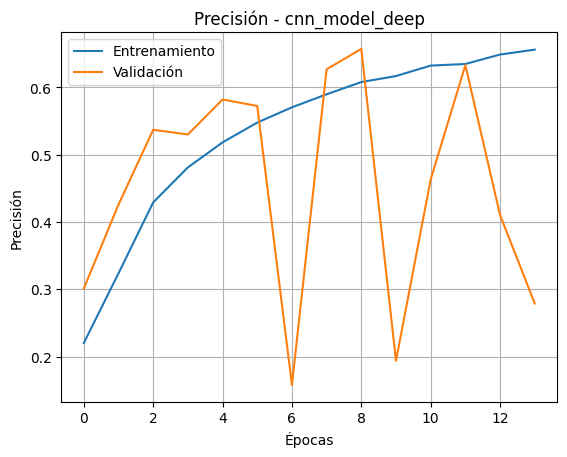

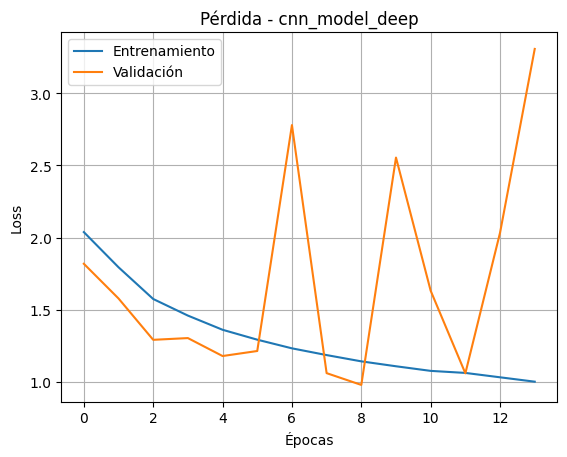

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
cnn_model_deep - Total de errores: 7913

Clasificación para cnn_model_deep
              precision    recall  f1-score   support

       avión       0.16      0.56      0.25      1000
       coche       0.62      0.04      0.08      1000
         ave       0.19      0.38      0.25      1000
        gato       0.20      0.01      0.02      1000
      ciervo       0.10      0.01      0.03      1000
       perro       0.32      0.12      0.18      1000
        rana       1.00      0.00      0.00      1000
     caballo       0.29      0.27      0.28      1000
       barco       0.29      0.03      0.05      1000
      camión       0.23      0.65      0.34      1000

    accuracy                           0.21     10000
   macro avg       0.34      0.21      0.15     10000
weighted avg       0.34      0.21      0.15     10000



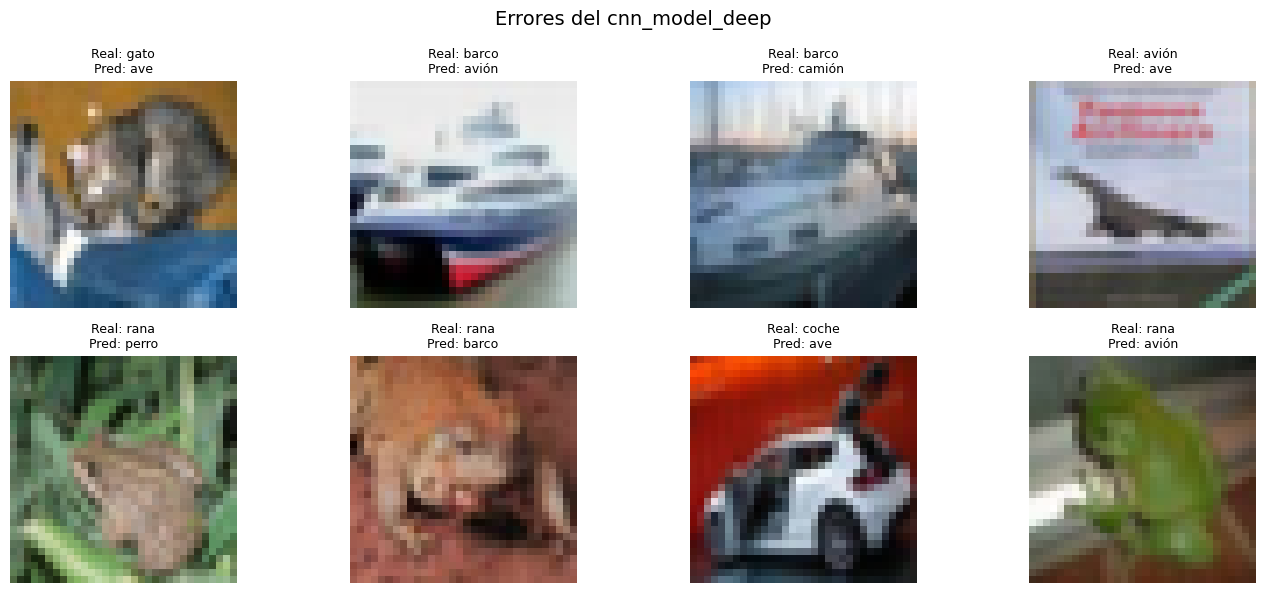

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


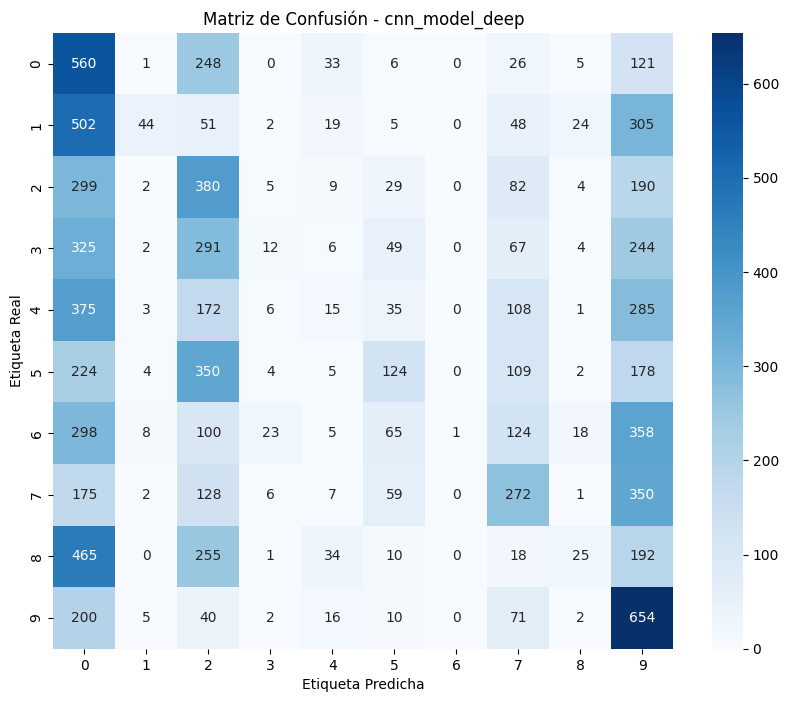


Ejecutando configuración 3: {'rotation_range': 0, 'zoom_range': 0.3, 'horizontal_flip': True}
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.2048 - loss: 2.1053 - val_accuracy: 0.3224 - val_loss: 1.7626
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.3362 - loss: 1.7736 - val_accuracy: 0.4625 - val_loss: 1.4823
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4376 - loss: 1.5547 - val_accuracy: 0.5061 - val_loss: 1.3749
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.4969 - loss: 1.4077 - val_accuracy: 0.4566 - val_loss: 1.6891
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.5559 - loss: 1.2719 - val_accuracy: 0.6336 - val_loss: 1.0462
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.5838 - loss: 1.1991 - val_accuracy: 0.6372 - val_loss: 1.0656
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.6101 - loss: 1.1280 - val_accuracy: 0.6019 - val_loss: 1.1899
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.6351 - loss: 1.06

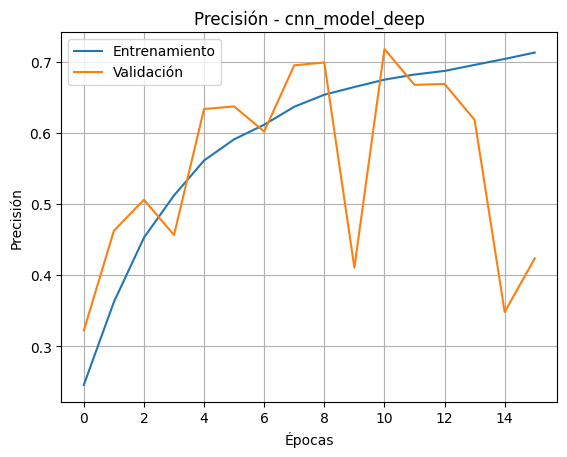

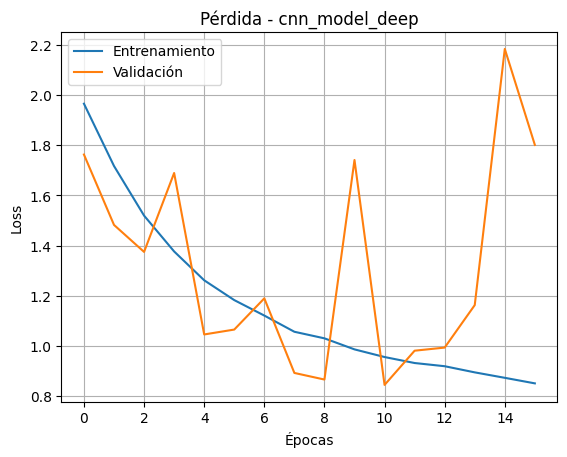

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
cnn_model_deep - Total de errores: 5945

Clasificación para cnn_model_deep
              precision    recall  f1-score   support

       avión       0.36      0.72      0.48      1000
       coche       0.52      0.74      0.61      1000
         ave       0.53      0.09      0.15      1000
        gato       0.40      0.01      0.01      1000
      ciervo       0.50      0.00      0.00      1000
       perro       0.56      0.44      0.49      1000
        rana       0.66      0.20      0.31      1000
     caballo       0.26      0.92      0.41      1000
       barco       0.51      0.22      0.30      1000
      camión       0.54      0.72      0.62      1000

    accuracy                           0.41     10000
   macro avg       0.48      0.41      0.34     10000
weighted avg       0.48      0.41      0.34     10000



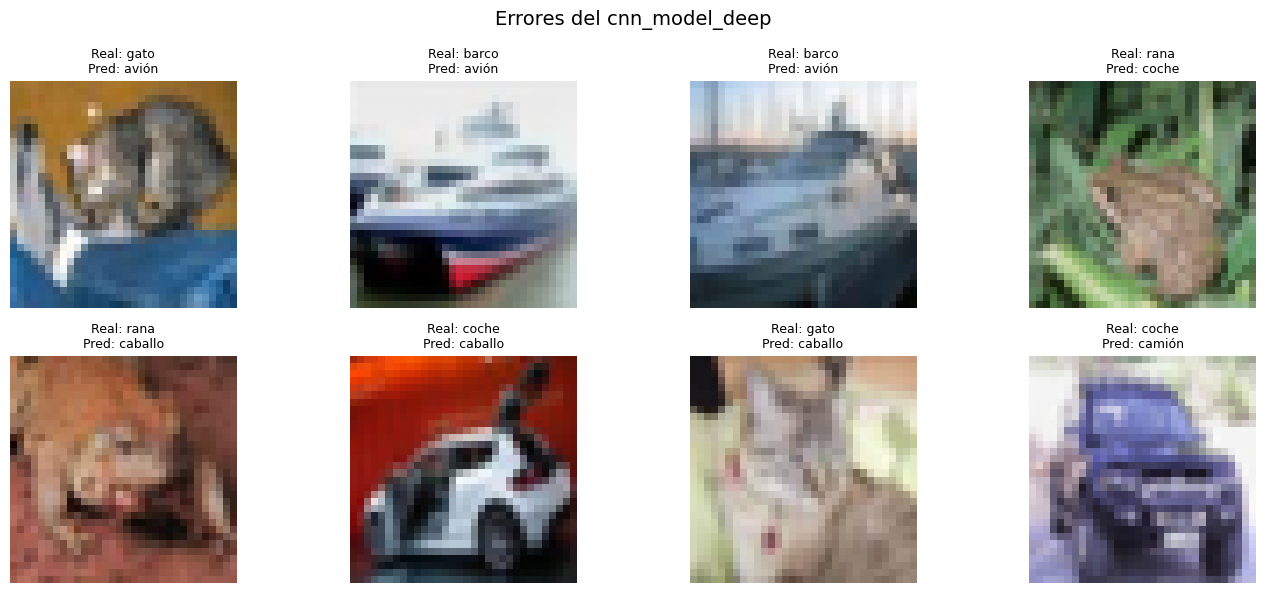

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


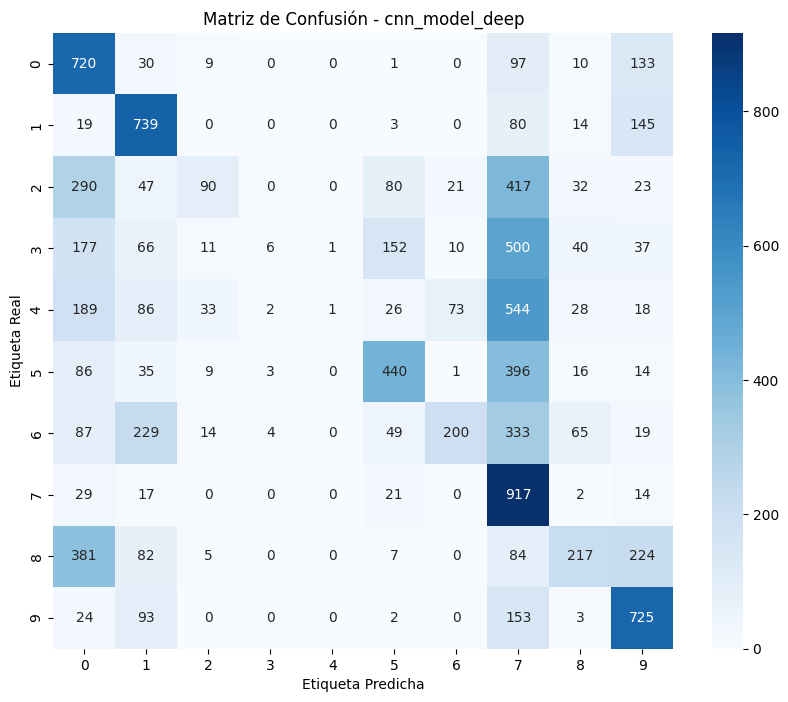


Ejecutando configuración 4: {'rotation_range': 20, 'zoom_range': 0.0, 'horizontal_flip': True}
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.2249 - loss: 2.0903 - val_accuracy: 0.1047 - val_loss: 4.2467
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.3898 - loss: 1.6581 - val_accuracy: 0.4705 - val_loss: 1.4744
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.4709 - loss: 1.4698 - val_accuracy: 0.5797 - val_loss: 1.1804
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.5241 - loss: 1.3387 - val_accuracy: 0.5885 - val_loss: 1.1462
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.5599 - loss: 1.2540 - val_accuracy: 0.6302 - val_loss: 1.0541
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.5819 - loss: 1.1914 - val_accuracy: 0.6020 - val_loss: 1.1819
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - accuracy: 0.6053 - loss: 1.1354 - val_accuracy: 0.6435 - val_loss: 1.0297
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6284 - loss: 1.07

In [ ]:
results = []

for i, config in enumerate(augment_configs):
    print(f"\nEjecutando configuración {i+1}: {config}")

    datagen = ImageDataGenerator(
        rescale=1./255,
        **config
    )

    train_generator = datagen.flow(
        x_train,
        y_train_one_hot,
        batch_size=32,
    )

    val_generator = datagen.flow(
        x_valid,
        y_valid_one_hot,
        batch_size=32,
    )

    model = build_cnn_model_deep()

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=20,
        callbacks=[early_stop],
        verbose=1
    )

    acc = history.history['val_accuracy'][-1]
    results.append((config, acc))

    plot_history(history, "cnn_model_deep")
    plot_loss(history, "cnn_model_deep")
    analizar_errores_visual(model, x_test, y_test_one_hot, nombre_modelo="cnn_model_deep")
    plot_confusion_matrix(model, x_test, y_test_one_hot, "cnn_model_deep")

In [ ]:
results = sorted(results, key=lambda x: x[1], reverse=True)
for config, acc in results:
    print(f"Config: {config} → Val Accuracy: {acc:.4f}")

Configuración 3 (zoom alto y flip, sin rotación) es la que mejor funciona.
Esto sugiere que zoom y flip horizontal son buenas para tu conjunto de datos, mientras que rotaciones altas (30°) dificultan el aprendizaje. Quizá porque los objetos en las imágenes no suelen aparecer rotados tanto.

En la configuración 1, el recall altísimo para avión pero casi nulo en otras clases indica un sesgo del modelo hacia ciertas clases.
Esto puede estar relacionado con desbalance o falta de diversidad en las muestras para otras clases.

En la configuración 2, el desempeño bajo probablemente se debe a la combinación de rotaciones agresivas sin flip, que genera imágenes poco representativas.

# Batch Normalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

def build_cnn_model_bn(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

Este modelo CNN incorpora:
- Tres bloques convolucionales con filtros crecientes (32, 64, 128).
- Capas de Batch Normalization tras cada convolución y capa densa, lo cual estabiliza y acelera el entrenamiento.
- ReLU como función de activación.
- Capas de MaxPooling2D para reducción de dimensionalidad.
- Dos capas densas finales: una intermedia (128 unidades) y la capa de salida con softmax.

In [ ]:
model = build_cnn_model_bn(input_shape=(32, 32, 3), num_classes=10)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_bn = model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=32),
                       epochs=20,
                       validation_data=(x_valid, y_valid_one_hot),
                       callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.4423 - loss: 1.5461 - val_accuracy: 0.4862 - val_loss: 1.5983
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.6125 - loss: 1.0909 - val_accuracy: 0.6869 - val_loss: 0.9035
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.6665 - loss: 0.9419 - val_accuracy: 0.6656 - val_loss: 1.0341
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.6976 - loss: 0.8553 - val_accuracy: 0.6854 - val_loss: 0.9497
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7139 - loss: 0.8095 - val_accuracy: 0.6172 - val_loss: 1.1996
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7348 - loss: 0.7550 - val_accuracy: 0.7646 - val_loss: 0.6893
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7454 - loss: 0.7246 - val_accuracy: 0.7539 - val_loss: 0.7085
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7572 - loss: 0.70

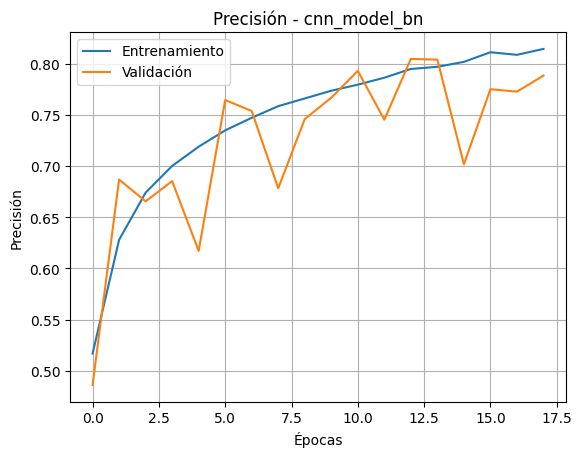

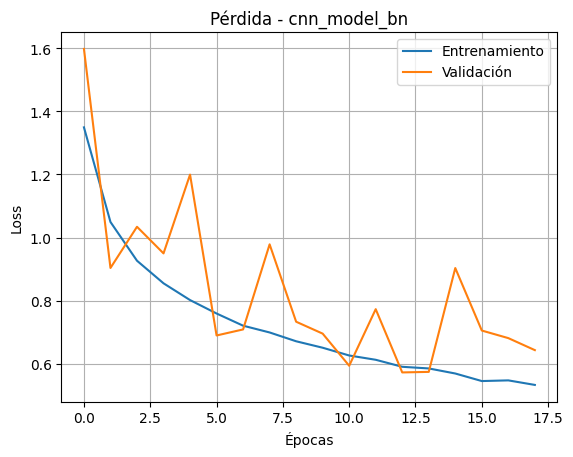

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
cnn_model_bn - Total de errores: 2018

Clasificación para cnn_model_bn
              precision    recall  f1-score   support

       avión       0.84      0.81      0.83      1000
       coche       0.91      0.91      0.91      1000
         ave       0.82      0.67      0.74      1000
        gato       0.59      0.70      0.64      1000
      ciervo       0.74      0.77      0.75      1000
       perro       0.74      0.69      0.71      1000
        rana       0.72      0.92      0.81      1000
     caballo       0.87      0.82      0.85      1000
       barco       0.95      0.81      0.88      1000
      camión       0.88      0.87      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



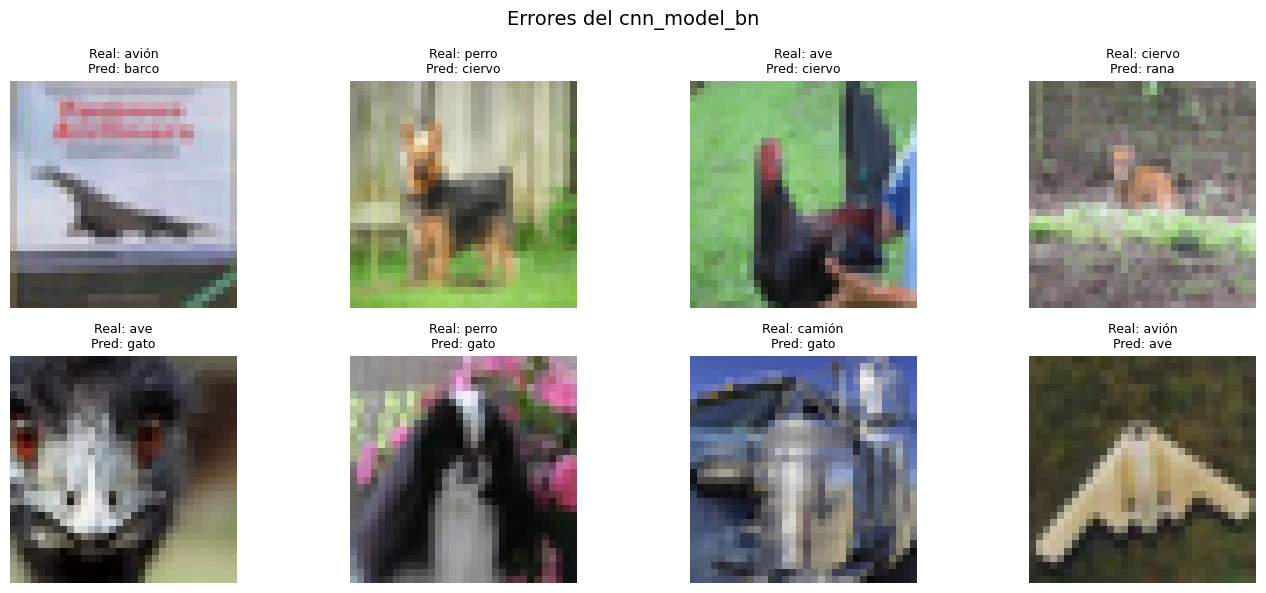

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


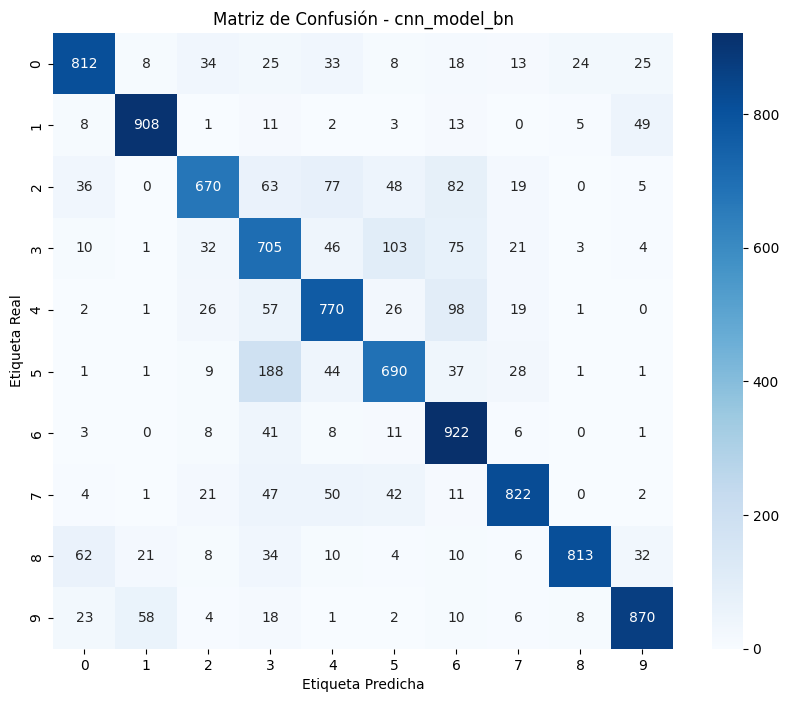

In [ ]:
plot_history(history_bn, "cnn_model_bn")
plot_loss(history_bn, "cnn_model_bn")
analizar_errores_visual(model, x_test, y_test_one_hot, nombre_modelo="cnn_model_bn")
plot_confusion_matrix(model, x_test, y_test_one_hot, "cnn_model_bn")

| Métrica                 | Resultado                    |
| ----------------------- | ---------------------------- |
| **Accuracy (val)**      | **80.48%**                   |   
| **Pérdida (val\_loss)** | **0.5721**                   |
| **Total de errores**    | **2018 / 10000**             |

El modelo alcanza una precisión del 80% en el conjunto de prueba, una mejora significativa respecto a versiones anteriores sin normalización por lotes.

El modelo funciona muy bien en clases estructuralmente distintivas (como camión, barco, coche), alcanzando precisiones superiores al 90% en algunas. Mientras que ave y gato siguen siendo dificiles de clasificar correctamente. Además, converge más rápido (accuracy > 75% en solo 10 épocas).

# Modelo CNN + BatchNormalization + Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

def build_cnn_model_bn_dropout(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [ ]:
model = build_cnn_model_bn_dropout(input_shape=(32, 32, 3), num_classes=10)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_do = model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=32),
                       epochs=50,
                       validation_data=(x_valid, y_valid_one_hot),
                       callbacks=[early_stop])

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.3452 - loss: 1.8451 - val_accuracy: 0.4931 - val_loss: 1.4246
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.5057 - loss: 1.3802 - val_accuracy: 0.6009 - val_loss: 1.0956
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.5620 - loss: 1.2445 - val_accuracy: 0.6562 - val_loss: 0.9801
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.5931 - loss: 1.1563 - val_accuracy: 0.6379 - val_loss: 1.0063
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.6090 - loss: 1.0961 - val_accuracy: 0.5846 - val_loss: 1.2390
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.6287 - loss: 1.0523 - val_accuracy: 0.7015 - val_loss: 0.8385
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.6437 - loss: 1.0175 - val_accuracy: 0.6944 - val_loss: 0.8510
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6596 -

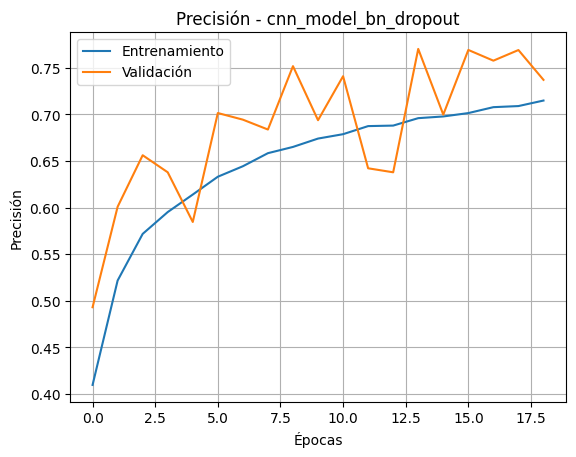

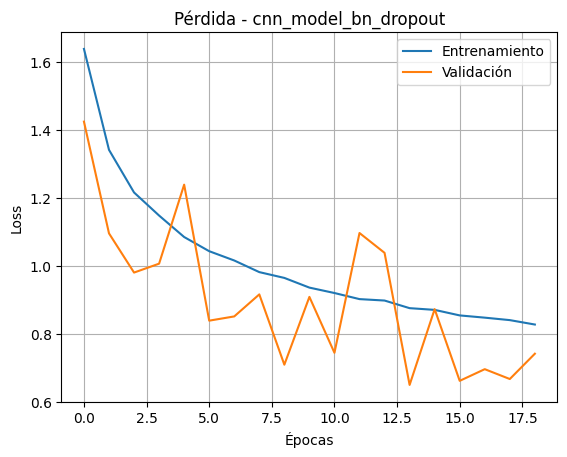

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
cnn_model_bn_dropout - Total de errores: 2316

Clasificación para cnn_model_bn_dropout
              precision    recall  f1-score   support

       avión       0.80      0.75      0.78      1000
       coche       0.92      0.90      0.91      1000
         ave       0.79      0.53      0.63      1000
        gato       0.68      0.52      0.59      1000
      ciervo       0.68      0.77      0.72      1000
       perro       0.72      0.64      0.68      1000
        rana       0.69      0.90      0.78      1000
     caballo       0.79      0.85      0.82      1000
       barco       0.82      0.91      0.87      1000
      camión       0.80      0.90      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.76     10000
weighted avg       0.77      0.77      0.76     10000



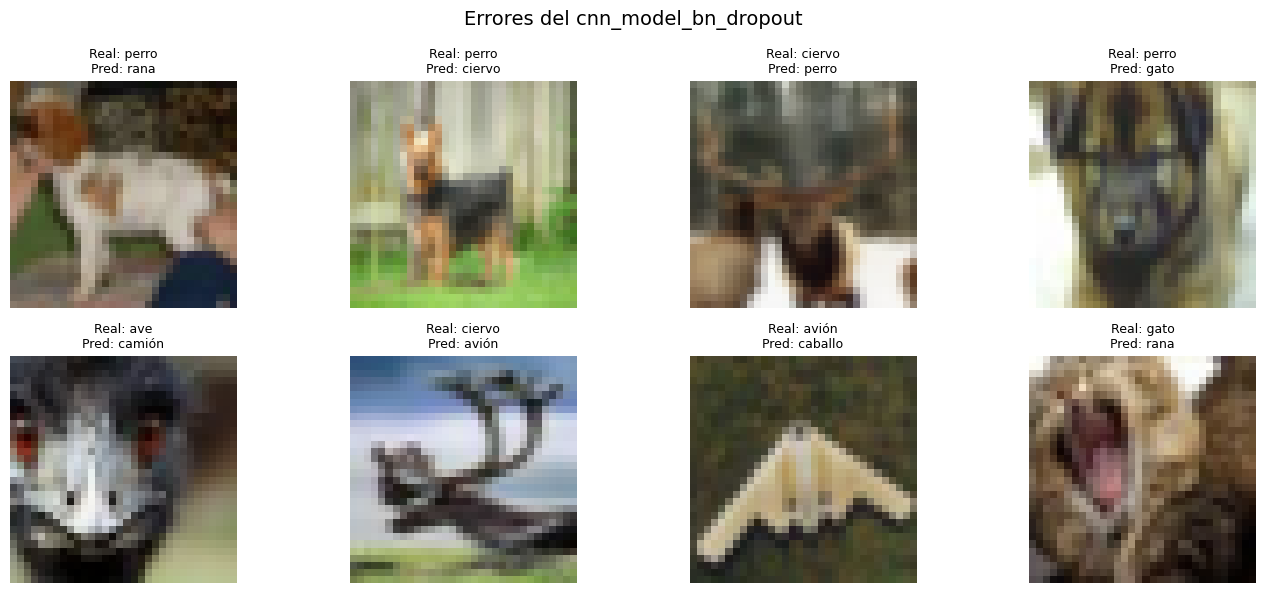

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


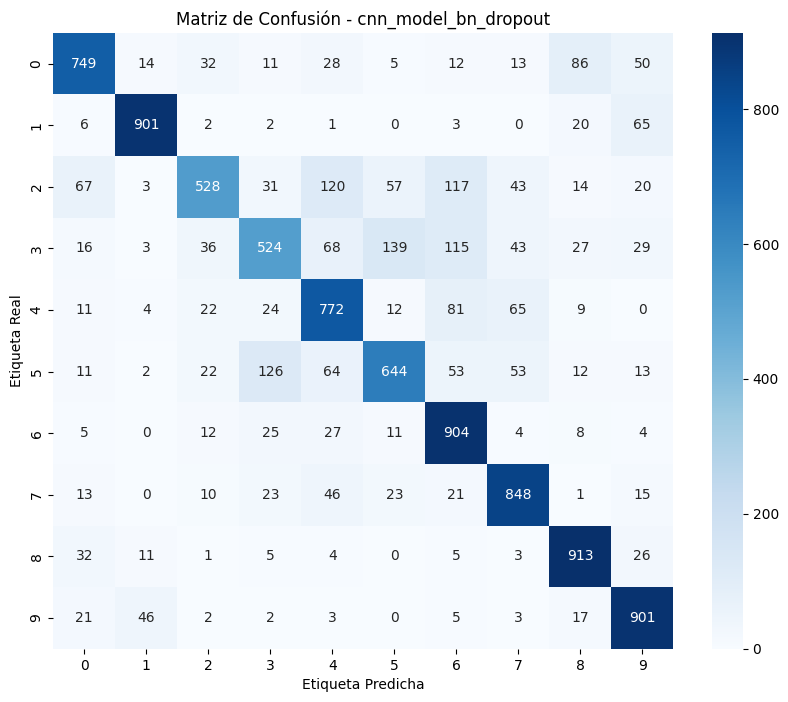

In [ ]:
plot_history(history_do, "cnn_model_bn_dropout")
plot_loss(history_do, "cnn_model_bn_dropout")
analizar_errores_visual(model, x_test, y_test_one_hot, nombre_modelo="cnn_model_bn_dropout")
plot_confusion_matrix(model, x_test, y_test_one_hot, "cnn_model_bn_dropout")

| Métrica                  | Valor                 |
| ------------------------ | --------------------- |
| **Accuracy (val)**       | **0.7703**            |
| **Loss (val)**           | **0.6492**            |
| **Total de errores**     | **2316 / 10000**      |

Aunque el rendimiento global es ligeramente menor al del modelo sin Dropout (80.48%), el modelo muestra mayor estabilidad frente al sobreajuste. Además, hay una mejora constante durante las primeras 15 épocas.

El uso de Dropout reduce el sobreajuste, pero también puede disminuir la capacidad del modelo para aprender patrones más complejos en clases visualmente ambiguas como ave y gato.



# CNN Profunda Optimizada

- Se compone de tres bloques principales de convolución con 64, 128 y 256 filtros, respectivamente, lo que permite extraer características desde bajo nivel (bordes, texturas) hasta alto nivel (formas complejas).
- Cada bloque incluye dos capas Conv2D con activación ReLU, seguidas de BatchNormalization para estabilizar y acelerar el entrenamiento.
- Los bloques terminan con capas de MaxPooling2D para reducir dimensionalidad espacial y capturar características espaciales más relevantes.
- Dropout con tasas que aumentan en profundidad (0.25 a 0.5) para reducir el sobreajuste y mejorar la generalización del modelo.
- Optimizador Adam.
- EarlyStopping
- ReduceLROnPlateau ajusta dinámicamente la tasa de aprendizaje.
- Data Augmentation.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

train_generator = datagen.flow(x_train, y_train_one_hot, batch_size=32)
val_generator = datagen.flow(x_valid, y_valid_one_hot, batch_size=32)

def build_cnn_model_deep_optimizado(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),

        Conv2D(256, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.4),

        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

early_stop = EarlyStopping(patience=8, restore_best_weights=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(patience=3, factor=0.5, monitor='val_loss', verbose=1)

model = build_cnn_model_deep_optimizado(input_shape=x_train.shape[1:], num_classes=y_train_one_hot.shape[1])
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.3094 - loss: 2.1499 - val_accuracy: 0.4638 - val_loss: 1.5139 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - accuracy: 0.5093 - loss: 1.3650 - val_accuracy: 0.5507 - val_loss: 1.3026 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.5905 - loss: 1.1598 - val_accuracy: 0.5547 - val_loss: 1.2900 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.6382 - loss: 1.0358 - val_accuracy: 0.6357 - val_loss: 1.0261 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.6687 - loss: 0.9592 - val_accuracy: 0.6889 - val_loss: 0.8960 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - accuracy: 0.6947 - loss: 0.8876 - val_accuracy: 0.6176 - val_loss: 1.1488 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.7199 

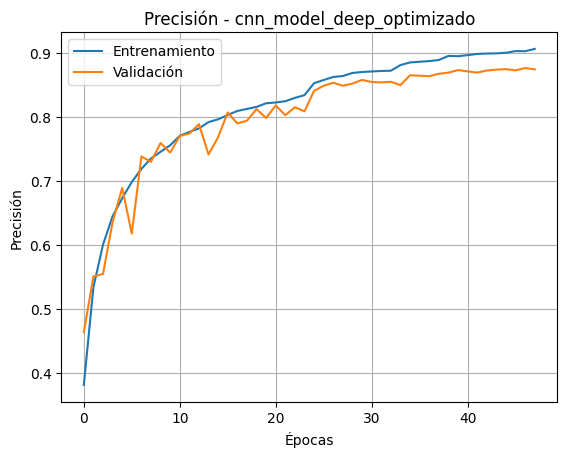

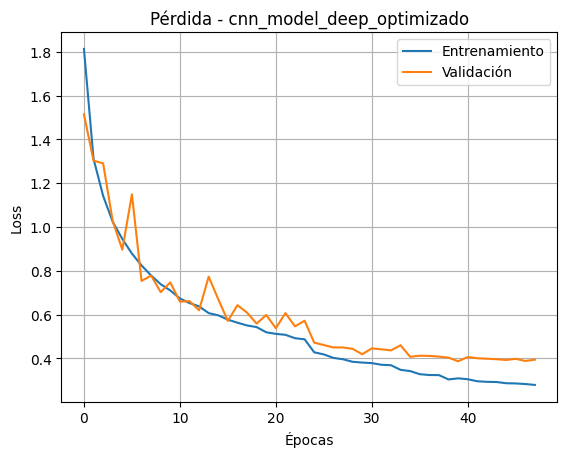

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
cnn_model_deep_optimizado - Total de errores: 1109

Clasificación para cnn_model_deep_optimizado
              precision    recall  f1-score   support

       avión       0.92      0.89      0.90      1000
       coche       0.93      0.96      0.95      1000
         ave       0.88      0.84      0.86      1000
        gato       0.85      0.73      0.79      1000
      ciervo       0.89      0.88      0.89      1000
       perro       0.88      0.80      0.84      1000
        rana       0.81      0.97      0.88      1000
     caballo       0.91      0.92      0.92      1000
       barco       0.94      0.94      0.94      1000
      camión       0.88      0.96      0.92      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



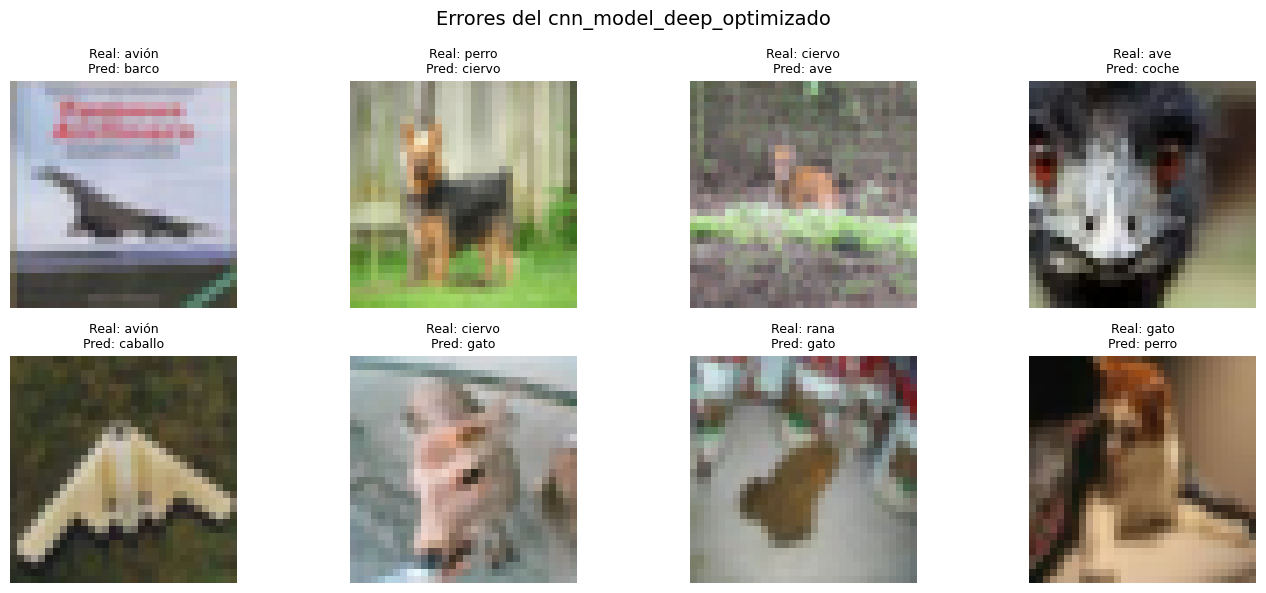

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


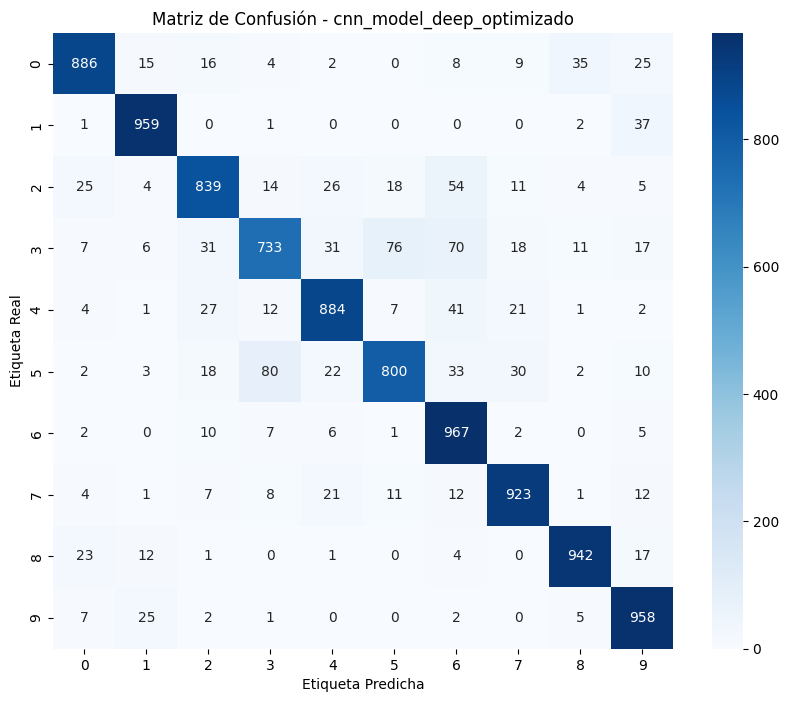

In [ ]:
plot_history(history, "cnn_model_deep_optimizado")
plot_loss(history, "cnn_model_deep_optimizado")
analizar_errores_visual(model, x_test, y_test_one_hot, nombre_modelo="cnn_model_deep_optimizado")
plot_confusion_matrix(model, x_test, y_test_one_hot, "cnn_model_deep_optimizado")

| Métrica                      | Valor Final |
| ---------------------------- | ----------- |
| **Accuracy Entrenamiento**   | 90.74%      |
| **Accuracy Validación**      | 87.61%      |
| **Loss Validación**          | 0.386       |
| **Learning Rate Final**      | 3.125e-05   |
| **Reducción de LR**          | 4 veces     |

A partir de la época 16, la precisión en validación comienza a seguir muy de cerca a la precisión en entrenamiento. No hay señales fuertes de sobreajuste (overfitting), ya que la pérdida de validación sigue bajando junto con la de entrenamiento.

El modelo logra una alta precisión en validación (≈87%), lo que indica que ha aprendido a generalizar bien.

Al igual que los modelos anteriores, tiene mayor problema en detectar la clase gato, sin embargo con mayor recall. Mientras que Coche, Barco, Camión, Caballo, todas superan 91–92% de F1-score.

# Transfer Learning

Se intentó implementar técnicas de Transfer Learning usando arquitecturas preentrenadas como VGG16, ResNet50 y EfficientNet, con la intención de aprovechar redes entrenadas sobre grandes datasets (como ImageNet). Sin embargo, debido a limitaciones de memoria RAM en el entorno de ejecución, no se pudo completar el entrenamiento de estas arquitecturas más pesadas. Esto impidió evaluar el rendimiento del modelo con transferencias profundas, por lo que se optó por optimizar una CNN desde cero.



# Análisis Final

**Dropout**
- Mejora la regularización.
- Reduce el sobreajuste.
- Efectivo combinado con otras técnicas (especialmente BatchNorm).
- Útil, pero no suficiente por sí solo.

**Batch Normalization**
- Acelera la convergencia.
- Compatible con Dropout.

**Data Augmentation**
- Aumenta el tamaño efectivo del dataset.
- Mejora la generalización.
- Reduce el riesgo de overfitting sin necesidad de alterar la arquitectura.

**Cantidad Capaz Convolucionales**
- Modelos con 2 capas son suficientes para tareas simples, pero limitan la capacidad de representación.
- Modelos más profundos (3 o más capas) permiten extraer características más complejas.
- No siempre más capas es mejor modelo, pero sí ayuda cuando se combinan bien con regularización.

**Mejor Modelo: CNN Profunda Optimizada**
- Uso combinado de Dropout, Batch Normalization y Data Augmentation.
- Arquitectura más profunda (más capas convolucionales).
- Ajuste dinámico del learning rate con ReduceLROnPlateau.
- Mejor equilibrio entre precisión de entrenamiento y validación.
- Última precisión de validación: 87.61% con baja pérdida.